In [1]:
# Current date and time

from datetime import datetime

print(datetime.now())

2021-08-08 18:35:53.927037


In [1]:
# Import libraries
# for dataset handeling and calculations
import numpy as np 
import pandas as pd 

In [2]:
# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline 

# for advanced visualizations
import seaborn as sns

# for interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# for offline ploting 
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime,timedelta

# for file and folder operations
import os

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# lets mount drive and read datasets in colab
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Set the path
import os
path = '/content/drive/MyDrive/second_project data/second_project'

os.chdir(path)

print(os.getcwd())

/content/drive/MyDrive/second_project data/second_project


In [5]:
# Read the Data sets
covid19_date_country=pd.read_csv('covid19_date_country.csv')
india_df=pd.read_csv('covid19_india.csv')
covid19_country_latest=pd.read_csv('covid19_country_latest.csv')
covid19_world=pd.read_csv('covid19_world.csv')

In [6]:
# lets check the datasets
covid19_country_latest

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region
0,Afghanistan,145996,6615,82586,56795,444,38,0,56.57,4.53,EMRO
1,Albania,132999,2457,130187,355,47,0,13,97.89,1.85,EURO
2,Algeria,168668,4189,113707,50772,1537,28,807,67.41,2.48,AFRO
3,Andorra,14655,127,14180,348,69,0,67,96.76,0.87,EURO
4,Angola,42486,1003,36025,5458,198,3,61,84.79,2.36,AFRO
...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,133405,1022,31780,100603,9765,392,4323,23.82,0.77,WPRO
190,West Bank and Gaza,316487,3601,311714,1172,159,0,92,98.49,1.14,EMRO
191,Yemen,7042,1374,4171,1497,15,0,3,59.23,19.51,EMRO
192,Zambia,194140,3355,185210,5575,708,17,1253,95.40,1.73,AFRO


In [7]:
covid19_date_country

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,WHO region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,EMRO
1,2020-01-22,Albania,0,0,0,0,0,0,0,EURO
2,2020-01-22,Algeria,0,0,0,0,0,0,0,AFRO
3,2020-01-22,Andorra,0,0,0,0,0,0,0,EURO
4,2020-01-22,Angola,0,0,0,0,0,0,0,AFRO
...,...,...,...,...,...,...,...,...,...,...
107665,2021-07-29,Vietnam,133405,1022,31780,100603,9765,392,4323,WPRO
107666,2021-07-29,West Bank and Gaza,316487,3601,311714,1172,159,0,92,EMRO
107667,2021-07-29,Yemen,7042,1374,4171,1497,15,0,3,EMRO
107668,2021-07-29,Zambia,194140,3355,185210,5575,708,17,1253,AFRO


In [8]:
india_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,WHO region
0,2020-01-22,India,0,0,0,0,0,0,0,SEARO
1,2020-01-23,India,0,0,0,0,0,0,0,SEARO
2,2020-01-24,India,0,0,0,0,0,0,0,SEARO
3,2020-01-25,India,0,0,0,0,0,0,0,SEARO
4,2020-01-26,India,0,0,0,0,0,0,0,SEARO
...,...,...,...,...,...,...,...,...,...,...
550,2021-07-25,India,31411262,420967,30579106,411189,39361,416,35968,SEARO
551,2021-07-26,India,31440951,421382,30621469,398100,29689,415,42363,SEARO
552,2021-07-27,India,31484605,422022,30663147,399436,43654,640,41678,SEARO
553,2021-07-28,India,31528114,422662,30701612,403840,43509,640,38465,SEARO


In [9]:
covid19_world

,Date,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
0,2020-01-22,557,17,30,510,0,0,0,5.39,3.05,6
1,2020-01-23,655,18,32,605,98,1,2,4.89,2.75,8
2,2020-01-24,941,26,39,876,286,8,7,4.14,2.76,9
3,2020-01-25,1433,42,42,1349,492,16,3,2.93,2.93,11
4,2020-01-26,2118,56,56,2006,685,14,14,2.64,2.64,13
...,...,...,...,...,...,...,...,...,...,...,...
550,2021-07-25,194177651,4159785,126243058,63774808,438981,6961,330719,-1.34,2.14,193
551,2021-07-26,194715002,4167657,126539108,64008237,537351,7872,296050,-1.19,2.14,193
552,2021-07-27,195330952,4177679,126882703,64270570,615950,10022,343595,-1.01,2.14,193
553,2021-07-28,195967589,4187364,127220909,64559316,636637,9685,338206,-0.83,2.14,193


In [10]:
# lets convert the date into proper format
# convert dates to proper date formats

covid19_date_country['Date'] = pd.to_datetime(covid19_date_country['Date'])

india_df['Date'] = pd.to_datetime(india_df['Date'])

covid19_world['Date'] = pd.to_datetime(covid19_world['Date'])

Data modeling and prediction based on univariate time series.
Prediction of total confirmed cases of the world

In [12]:
# find numbers related to dates
numbers_of_dates = covid19_world.index.values.reshape(-1, 1)

In [13]:
# number of days in future considered to forecast
future_days = 10

# find numbers related to days from start to future
numbers_start_to_futures = np.array([i for i in range(covid19_world.shape[0]+future_days)]).reshape(-1, 1)

In [14]:
numbers_start_to_futures.shape , numbers_of_dates.shape # now we add future day in indentifier

((565, 1), (555, 1))

In [15]:
# first date in the dataset
first_date = covid19_world['Date'].tolist()[0]

In [16]:
first_date

Timestamp('2020-01-22 00:00:00')

In [18]:
# find dates related to days from start to future for better visualization
dates_start_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(len(numbers_start_to_futures))])
print(dates_start_to_futures.shape)

(565,)


In [19]:
dates_start_to_futures

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
560   2021-08-04
561   2021-08-05
562   2021-08-06
563   2021-08-07
564   2021-08-08
Length: 565, dtype: datetime64[ns]

In [20]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(numbers_of_dates[50:],
                                                                                covid19_world['Confirmed'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(404, 1)
(404,)
(101, 1)
(101,)


***Support Vector Machine Regressor***

In [23]:
svm_reg = SVR(C=0.1,kernel='poly',gamma=0.01, epsilon=1)
svm_reg.fit(X_train_confirmed, y_train_confirmed)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
svm_pred = svm_reg.predict(numbers_start_to_futures[50:].reshape(-1,1))

y_pred_svm = svm_reg.predict(X_test_confirmed)

In [25]:
y_pred_svm  ,  svm_pred

(array([1.71901761e+08, 1.73008798e+08, 1.74120712e+08, 1.75237514e+08,
        1.76359213e+08, 1.77485822e+08, 1.78617351e+08, 1.79753809e+08,
        1.80895209e+08, 1.82041561e+08, 1.83192875e+08, 1.84349163e+08,
        1.85510434e+08, 1.86676700e+08, 1.87847972e+08, 1.89024260e+08,
        1.90205575e+08, 1.91391927e+08, 1.92583327e+08, 1.93779787e+08,
        1.94981316e+08, 1.96187926e+08, 1.97399627e+08, 1.98616430e+08,
        1.99838345e+08, 2.01065384e+08, 2.02297557e+08, 2.03534874e+08,
        2.04777347e+08, 2.06024987e+08, 2.07277803e+08, 2.08535806e+08,
        2.09799009e+08, 2.11067420e+08, 2.12341051e+08, 2.13619912e+08,
        2.14904015e+08, 2.16193370e+08, 2.17487987e+08, 2.18787878e+08,
        2.20093053e+08, 2.21403523e+08, 2.22719298e+08, 2.24040389e+08,
        2.25366808e+08, 2.26698564e+08, 2.28035668e+08, 2.29378132e+08,
        2.30725966e+08, 2.32079180e+08, 2.33437785e+08, 2.34801793e+08,
        2.36171213e+08, 2.37546056e+08, 2.38926334e+08, 2.403120

In [26]:
df_svm = pd.DataFrame({'Actual': y_test_confirmed , 'Predicted': y_pred_svm})

In [27]:
df_svm

,Actual,Predicted
0,142956651,1.719018e+08
1,143846607,1.730088e+08
2,144746229,1.741207e+08
3,145649863,1.752375e+08
4,146471028,1.763592e+08
...,...,...
96,194177651,3.019470e+08
97,194715002,3.035711e+08
98,195330952,3.052011e+08
99,195967589,3.068370e+08


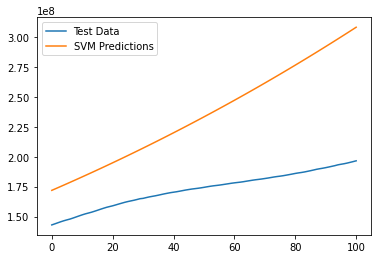

In [28]:
plt.plot(y_test_confirmed)
plt.plot(y_pred_svm)
plt.legend(['Test Data', 'SVM Predictions'])

In [29]:
mae=mean_absolute_error(y_pred_svm, y_test_confirmed)
mse=mean_squared_error(y_pred_svm, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 68123619.22
MAE of  SVR 63020811.13 



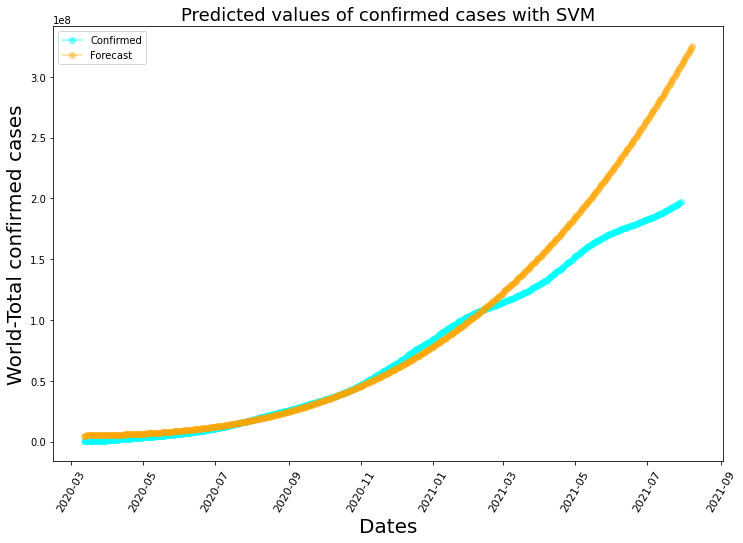

In [30]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with SVM" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

**Random Forest Regressor**

In [31]:
rf_reg = RandomForestRegressor(max_depth=7,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [32]:
rf_pred = rf_reg.predict(numbers_start_to_futures[50:].reshape(-1,1))

y_pred_rf = rf_reg.predict(X_test_confirmed)

In [33]:
df_rf = pd.DataFrame({'actual':y_test_confirmed , 'preidcted':y_pred_rf})

In [34]:
df_rf

,actual,preidcted
0,142956651,1.416117e+08
1,143846607,1.416117e+08
2,144746229,1.416117e+08
3,145649863,1.416117e+08
4,146471028,1.416117e+08
...,...,...
96,194177651,1.416117e+08
97,194715002,1.416117e+08
98,195330952,1.416117e+08
99,195967589,1.416117e+08


RMSE of  RandomForestRegressor 34229279.33
MAE of  RandomForestRegressor 31101100.61 



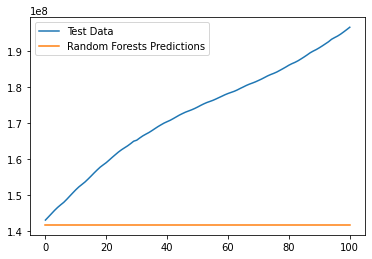

In [35]:
plt.plot(y_test_confirmed)
plt.plot(y_pred_rf)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred_rf, y_test_confirmed)
mse=mean_squared_error(y_pred_rf, y_test_confirmed)
rmse_rf = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse_rf,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

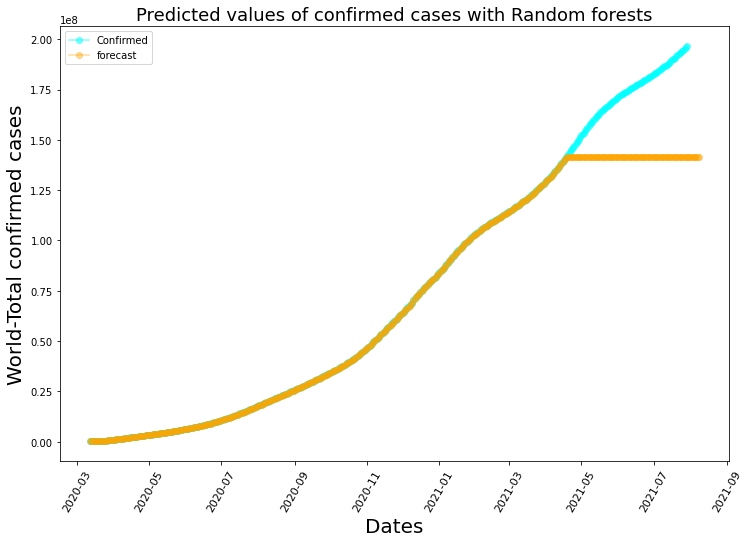

In [36]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with Random forests" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= rf_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

**XGBoost Regressor**


In [37]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

[04:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [39]:
xgb_reg.fit(X_train_confirmed, y_train_confirmed)

xgb_pred = xgb_reg.predict(numbers_start_to_futures[50:])

y_pred_xgb = xgb_reg.predict(X_test_confirmed)

RMSE of  XGBRegressor 68123619.22
MAE of  XGBRegressor 30615033.02 



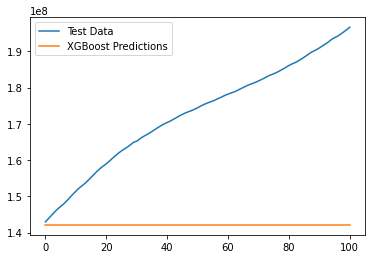

In [40]:
plt.plot(y_test_confirmed)
plt.plot(y_pred_xgb)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred_xgb, y_test_confirmed)
mse=mean_squared_error(y_pred_xgb, y_test_confirmed)
rmse_xgb = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

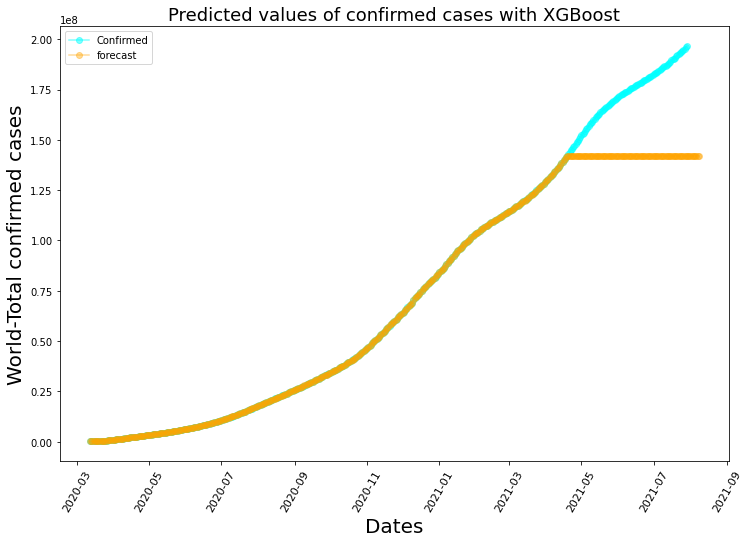

In [41]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with XGBoost" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= xgb_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

**ARIMA Forecasting**

In [42]:
# create a data frame with date and confirmed cases.
data = pd.DataFrame(columns = ['Date','y'])
data['Date'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Confirmed'][50:].values

In [43]:
arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

In [46]:
df_arima = pd.DataFrame({'Date':prediction_dates , 'preidiction':pred})

In [47]:
df_arima

,Date,preidiction
0,2021-07-30,1.972043e+08
1,2021-07-31,1.977626e+08
2,2021-08-01,1.983244e+08
3,2021-08-02,1.989067e+08
4,2021-08-03,1.995150e+08
5,2021-08-04,2.001134e+08
6,2021-08-05,2.006969e+08
7,2021-08-06,2.012665e+08
8,2021-08-07,2.018339e+08
9,2021-08-08,2.024103e+08


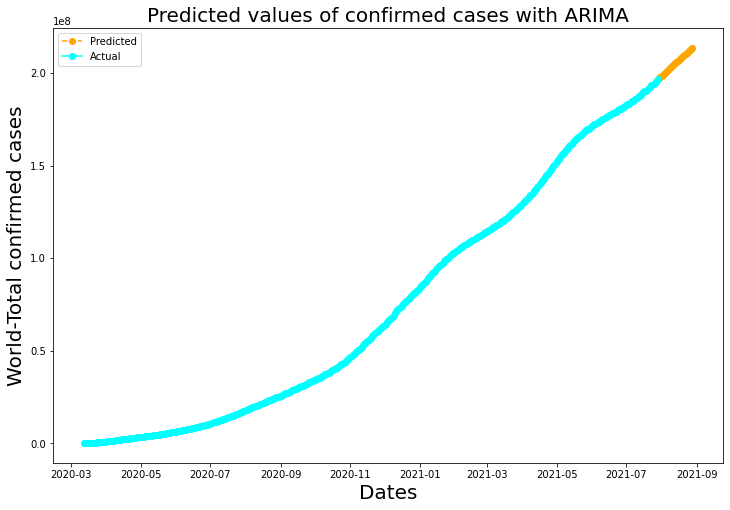

In [45]:
start_date = data['Date'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with ARIMA" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
plt.legend();

**Prophet Model for prediction**

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


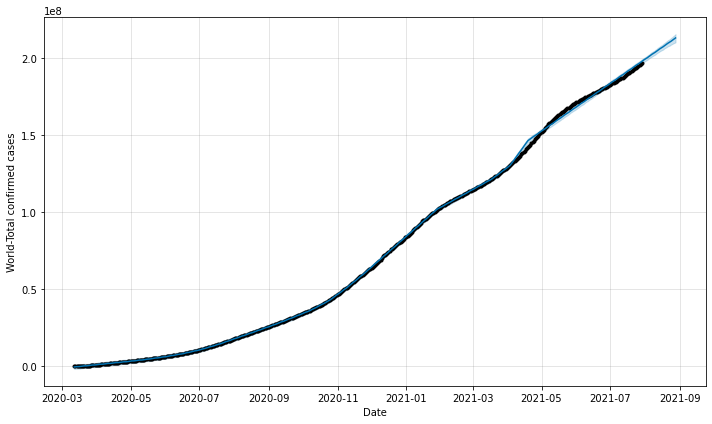

In [48]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Confirmed'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total confirmed cases')

In [49]:
forecast

,ds,yhat
505,2021-07-30,1.983193e+08
506,2021-07-31,1.988187e+08
507,2021-08-01,1.992549e+08
508,2021-08-02,1.996984e+08
509,2021-08-03,2.002052e+08
510,2021-08-04,2.007467e+08
511,2021-08-05,2.013106e+08
512,2021-08-06,2.018702e+08
513,2021-08-07,2.023695e+08
514,2021-08-08,2.028058e+08


**Prediction of Total deaths Cases of the world**

In [50]:
#Splitting the dataset related to death cases of the world into training and test sets

X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(numbers_of_dates[50:],
                                                                                covid19_world['Deaths'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_death.shape)
print(y_train_death.shape)
print(X_test_death.shape)
print(y_test_death.shape)

(404, 1)
(404,)
(101, 1)
(101,)


**Support Vector Machine regressor**

In [51]:
svm_reg_d = SVR(C=0.01,kernel='poly',gamma=0.01)
svm_reg_d.fit(X_train_death, y_train_death)

svm_pred_d = svm_reg_d.predict(numbers_start_to_futures[50:])

y_pred_d = svm_reg_d.predict(X_test_death)

In [52]:
df_svm_death = pd.DataFrame({'actual':y_test_death , 'prediction':y_pred_d})
df_svm_death

,actual,prediction
0,3145079,3.688364e+06
1,3160038,3.709781e+06
2,3173933,3.731293e+06
3,3189117,3.752899e+06
4,3202408,3.774600e+06
...,...,...
96,4159785,6.204290e+06
97,4167657,6.235710e+06
98,4177679,6.267245e+06
99,4187364,6.298894e+06


RMSE of  SVR 1289165.65
MAE of  SVR 1198278.23 



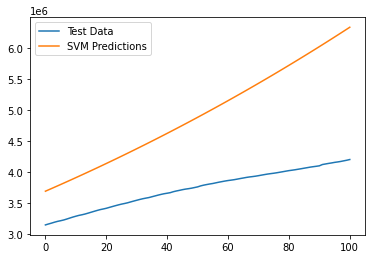

In [53]:
plt.plot(y_test_death)
plt.plot(y_pred_d)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred_d, y_test_death)
mse=mean_squared_error(y_pred_d, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

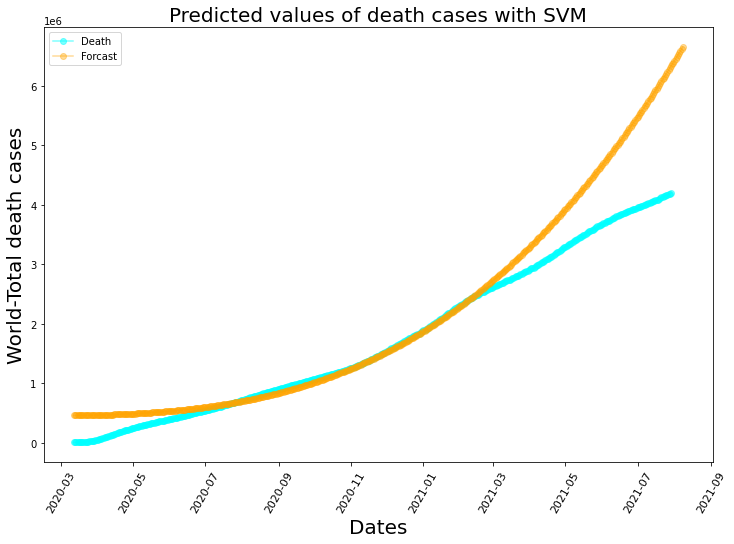

In [54]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with SVM" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred_d,x= dates_start_to_futures[50:],label = 'Forcast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

**linear Regression **

coef:  [ 1.83012040e+04 -6.09364161e+03  1.45676733e+02 -8.31428293e-01
  2.11666855e-03 -1.88375179e-06]
RMSE of  LinearRegression 1446097.27
MAE of  LinearRegression 1156180.88 



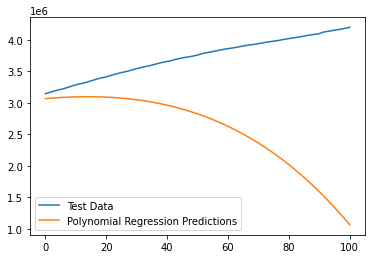

In [55]:
# transform the training data

poly_features=PolynomialFeatures(degree=5)

poly_X_train_death = poly_features.fit_transform(X_train_death)
poly_X_test_death = poly_features.fit_transform(X_test_death)
poly_future_forecast = poly_features.fit_transform(numbers_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)

lin_reg.fit(poly_X_train_death,y_train_death)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred_lr = lin_reg.predict(poly_X_test_death)

poly_pred_lr = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_death)
plt.plot(y_pred_lr)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred_lr, y_test_death)
mse=mean_squared_error(y_pred_lr, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2), '\n')

In [56]:
df_lr = pd.DataFrame({'actual':y_test_death , 'predicted':y_pred_lr})
df_lr

,actual,predicted
0,3145079,3.066801e+06
1,3160038,3.070876e+06
2,3173933,3.074681e+06
3,3189117,3.078213e+06
4,3202408,3.081465e+06
...,...,...
96,4159785,1.287245e+06
97,4167657,1.233121e+06
98,4177679,1.177950e+06
99,4187364,1.121719e+06


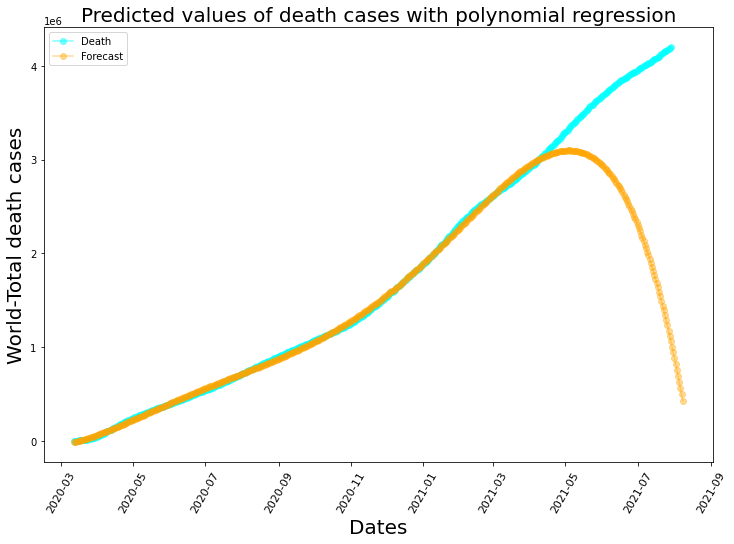

In [57]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with polynomial regression" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred_lr,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

**Prediction of Death with ARIMA**

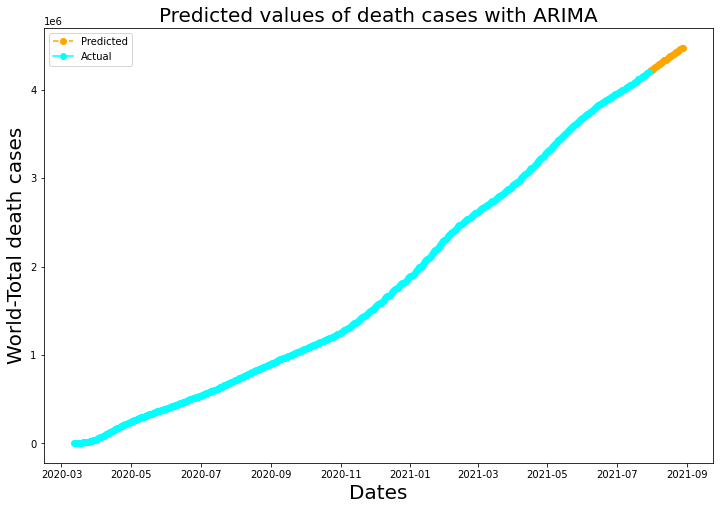

In [58]:
data = pd.DataFrame(columns = ['Date','y'])
data['Date'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Deaths'][50:].values

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['Date'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with ARIMA" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
plt.legend();

In [59]:
df_arima = pd.DataFrame({'Date':prediction_dates , 'preidiction':pred})

In [60]:
df_arima

,Date,preidiction
0,2021-07-30,4.209391e+06
1,2021-07-31,4.218767e+06
2,2021-08-01,4.228138e+06
3,2021-08-02,4.237550e+06
4,2021-08-03,4.247410e+06
5,2021-08-04,4.257362e+06
6,2021-08-05,4.267028e+06
7,2021-08-06,4.276465e+06
8,2021-08-07,4.285786e+06
9,2021-08-08,4.295150e+06


**Prophet Model for Prediction**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


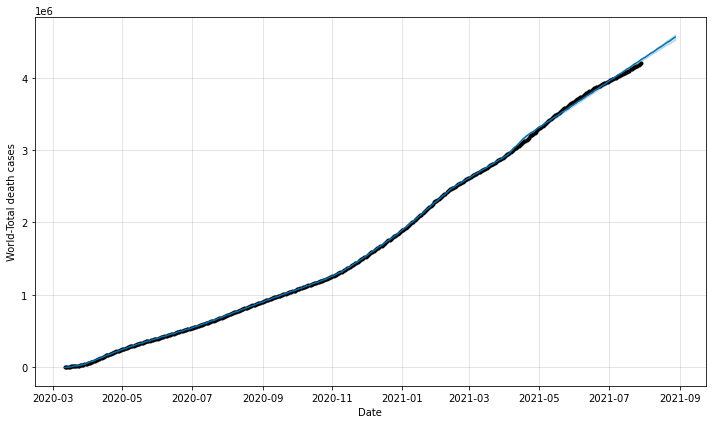

In [61]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Deaths'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total death cases')

In [62]:
forecast

,ds,yhat
505,2021-07-30,4.258170e+06
506,2021-07-31,4.268042e+06
507,2021-08-01,4.275966e+06
508,2021-08-02,4.284816e+06
509,2021-08-03,4.296549e+06
510,2021-08-04,4.308193e+06
511,2021-08-05,4.319730e+06
512,2021-08-06,4.331540e+06
513,2021-08-07,4.341412e+06
514,2021-08-08,4.349336e+06


**Prediction of confirmed cases of 5 most affected countries and India using  ARIMA and Prophet**

**ARIMA PREDICTION**

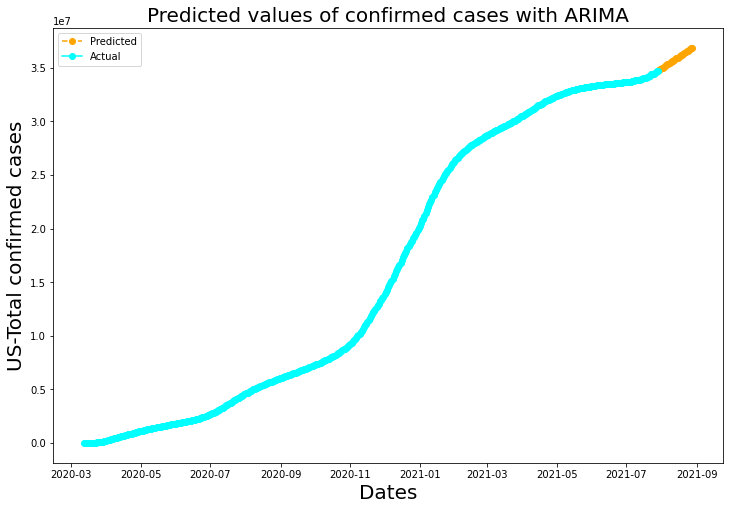

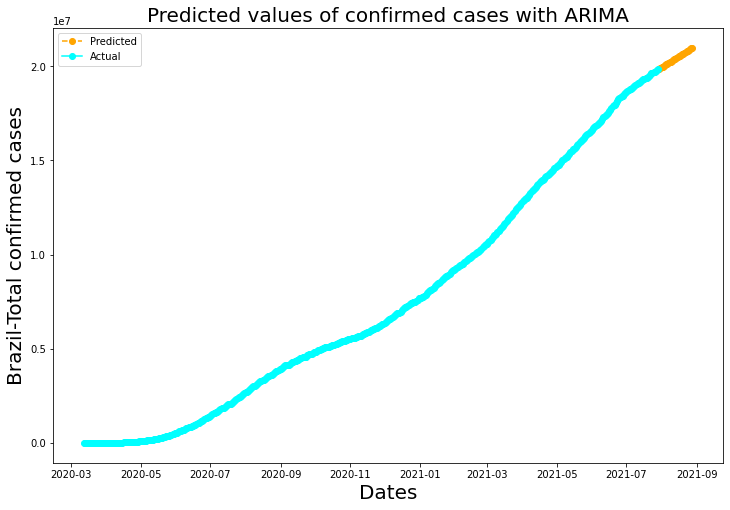

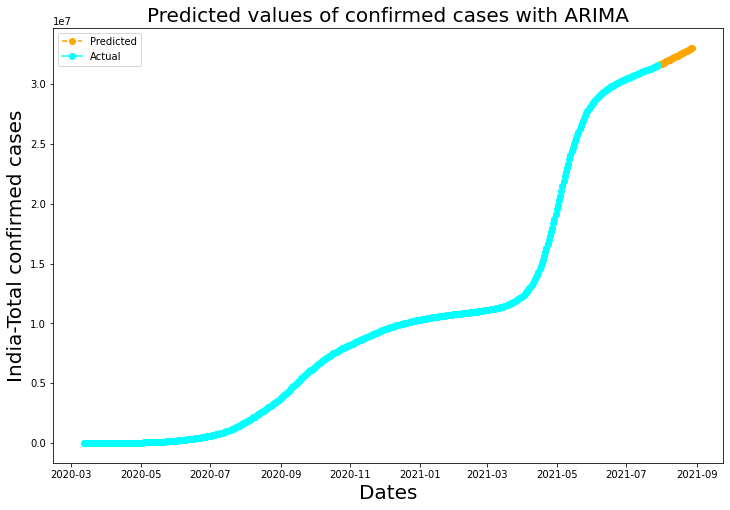

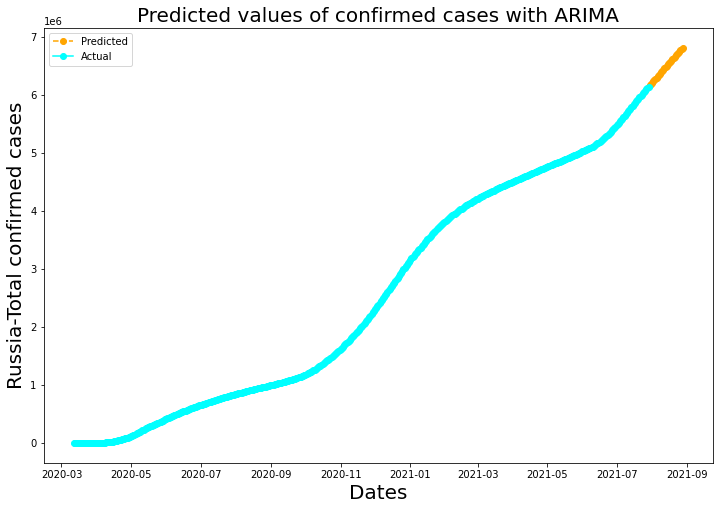

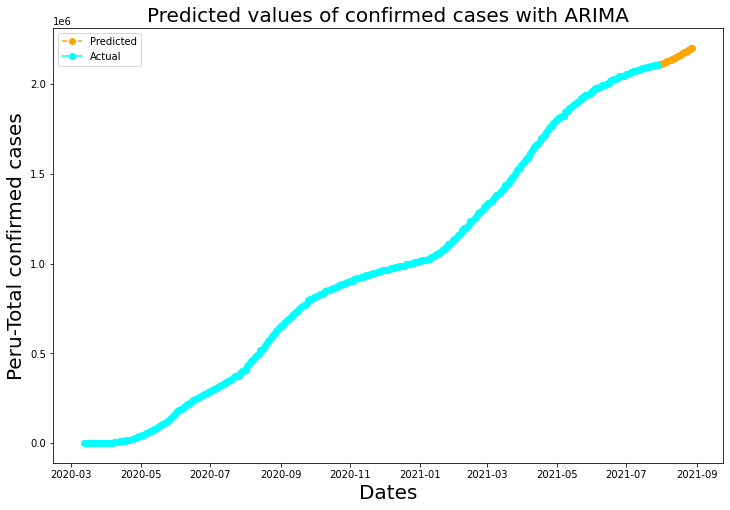

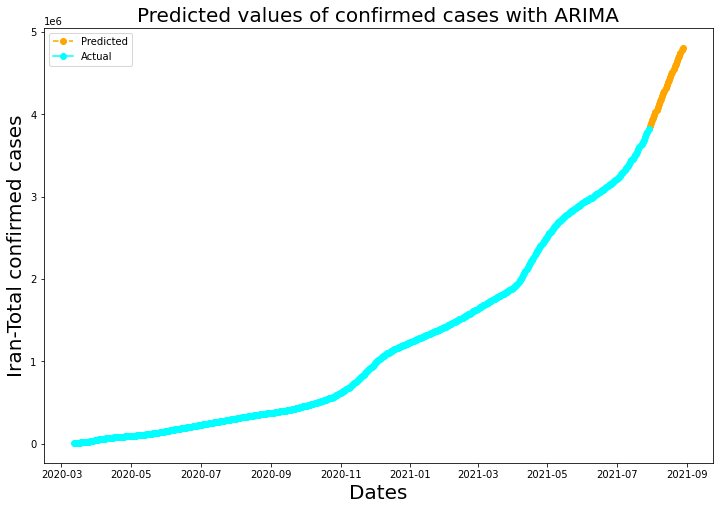

In [63]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['Date','y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values

    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 30)
    pred = list(forecast[0])

    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(30):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    plt.figure(figsize= (12,8))
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s-Total confirmed cases' %(j),fontsize = 20)
    plt.title("Predicted values of confirmed cases with ARIMA" , fontsize = 20)

    plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
    plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
    plt.legend();
    k=k+1

**Prophet Model for prediction**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

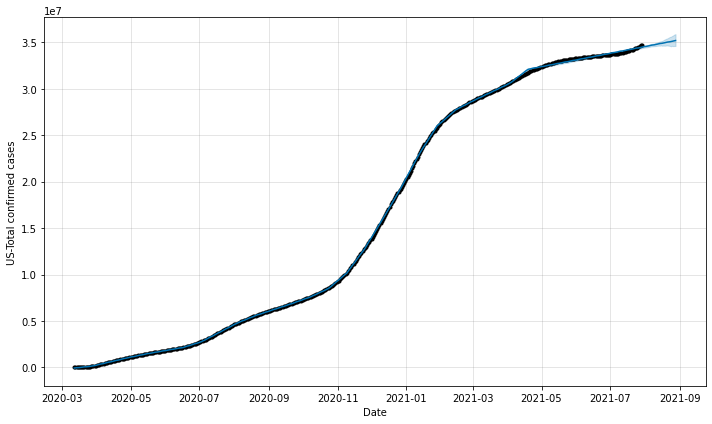

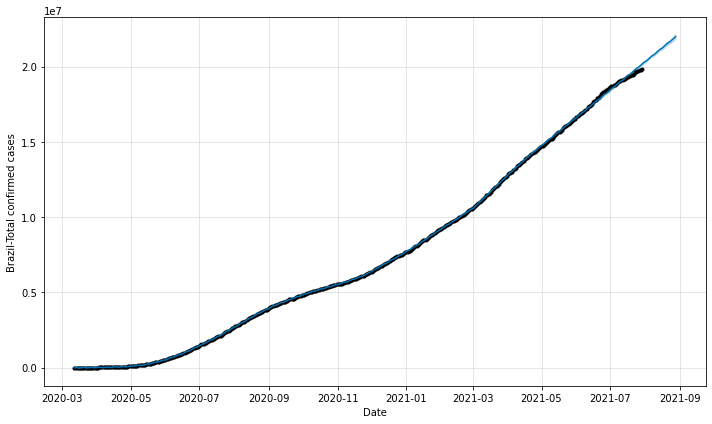

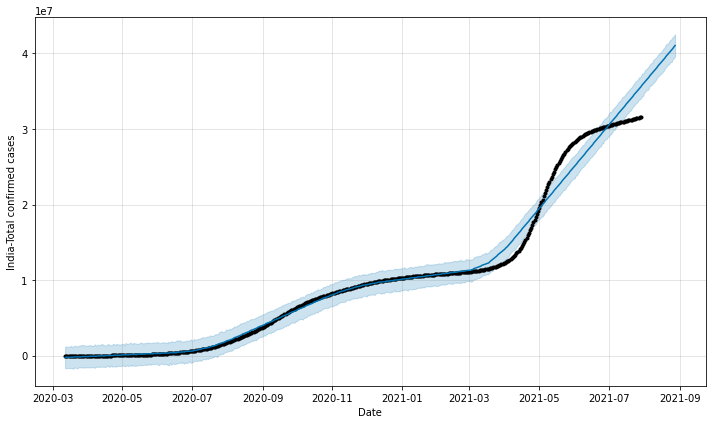

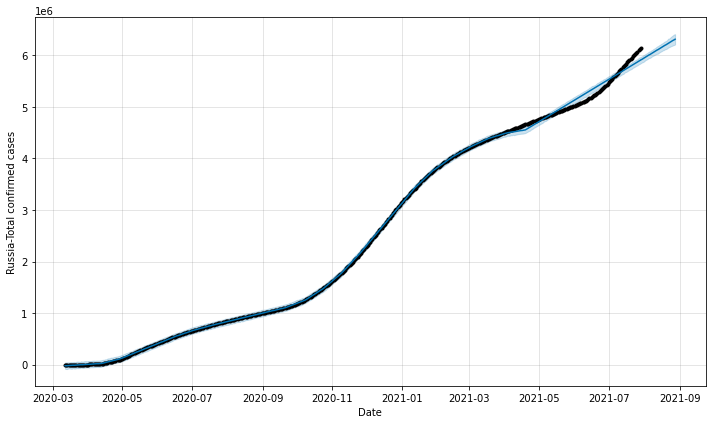

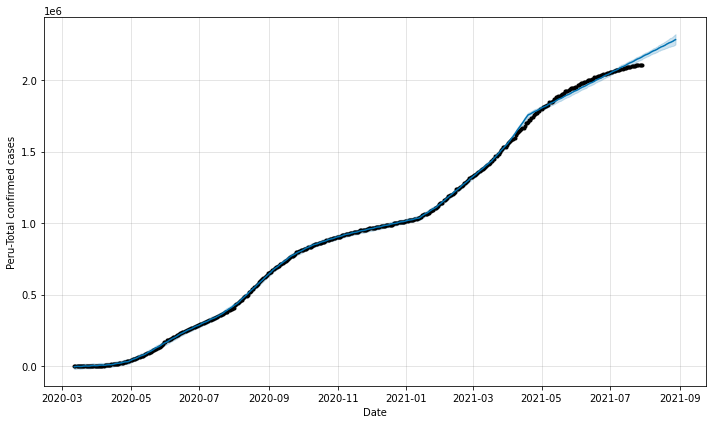

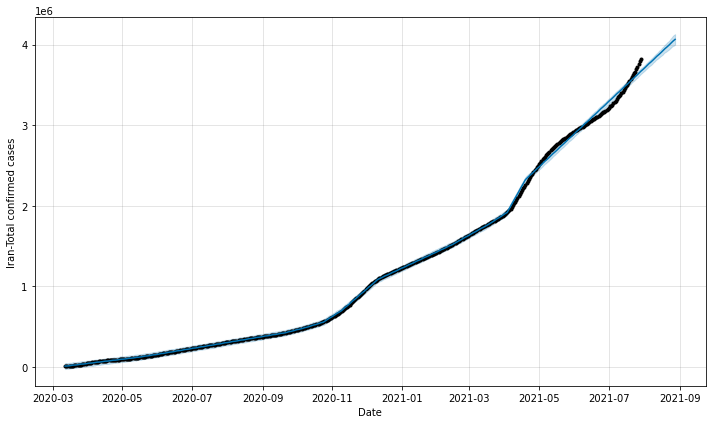

In [64]:
#most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total confirmed cases' %(j))
    k=k+1

**Deaths prediction of 5 most affected countries and India using ARIMA and Prophet**


**ARIMA for prediction **

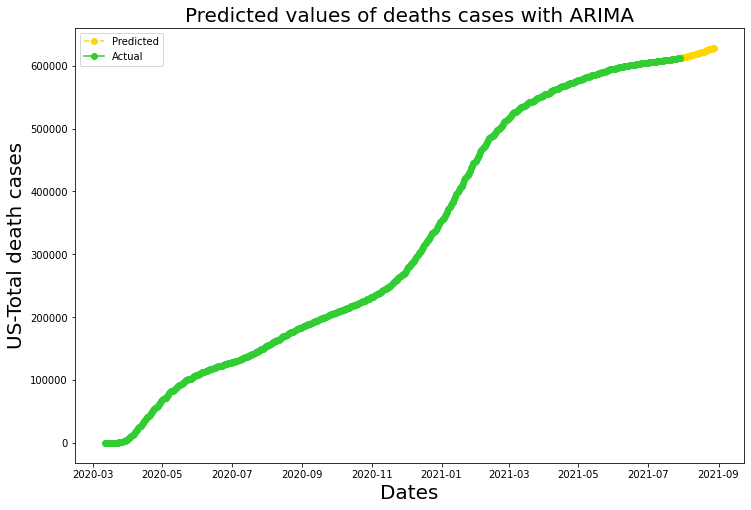

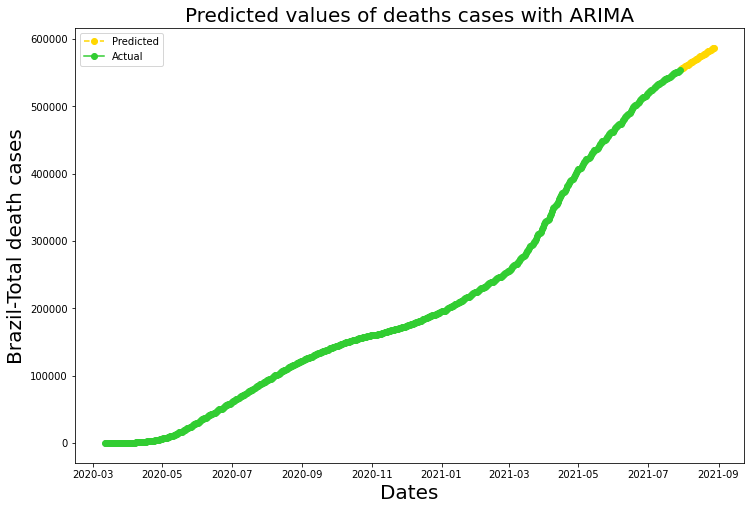

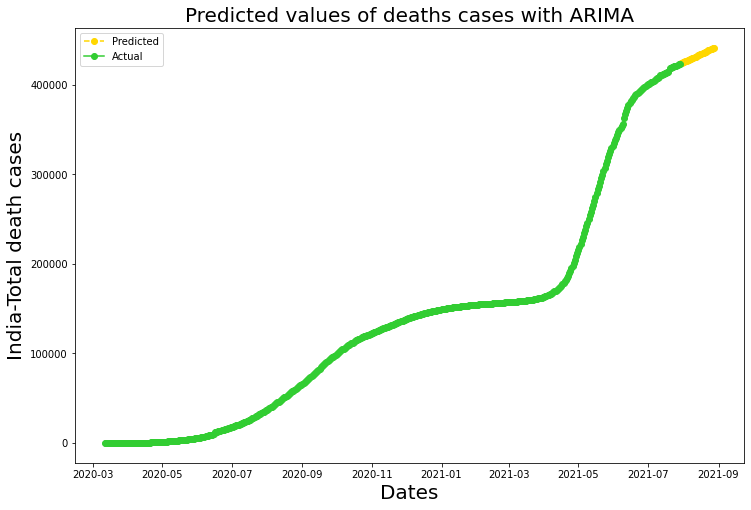

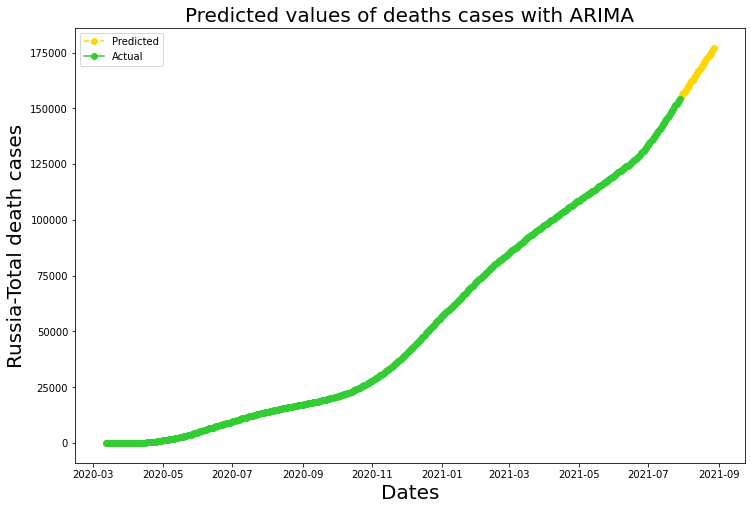

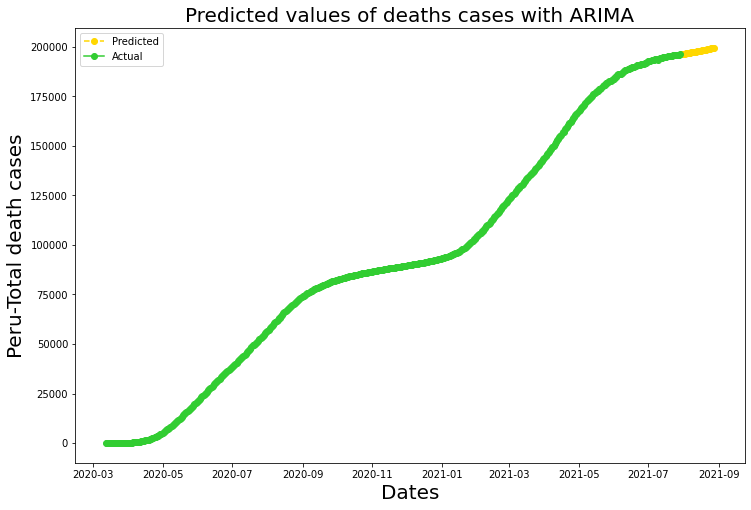

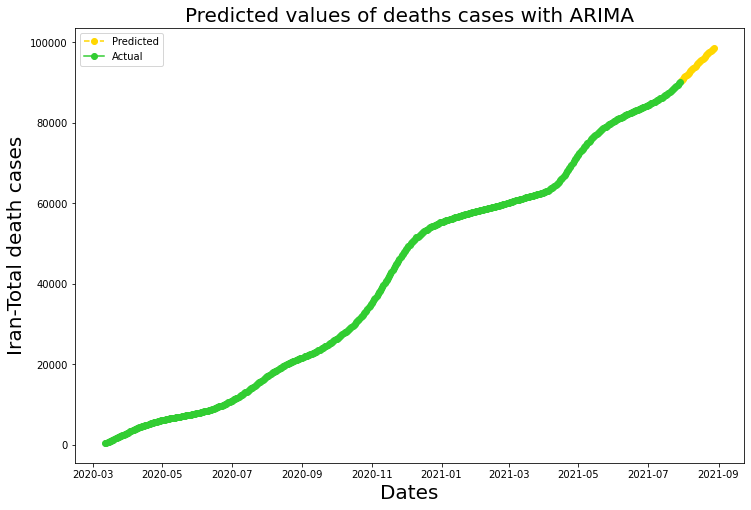

In [65]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['Date','y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 30)
    pred = list(forecast[0])

    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(30):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    plt.figure(figsize= (12,8))
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s-Total death cases' %(j),fontsize = 20)
    plt.title("Predicted values of deaths cases with ARIMA" , fontsize = 20)

    plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'gold',label = 'Predicted');
    plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'limegreen',label = 'Actual');
    plt.legend();
    k=k+1

**Prophet Model for prediction**

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

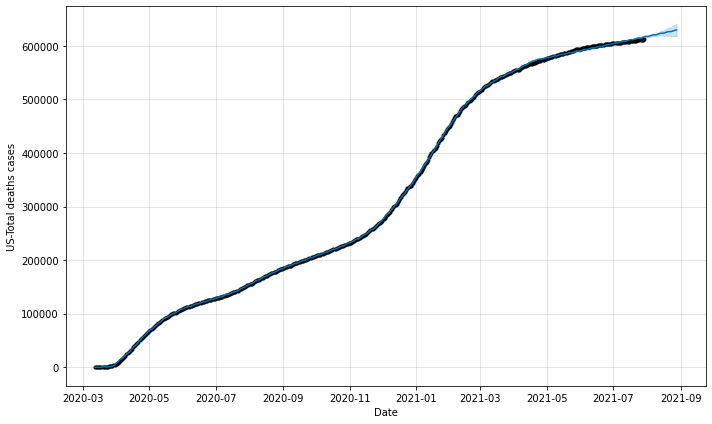

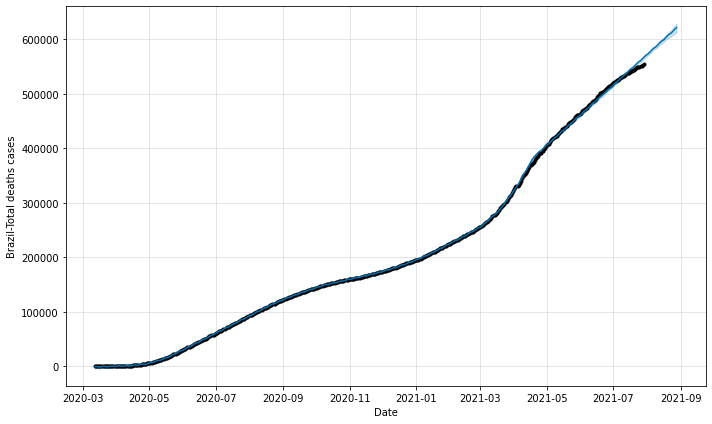

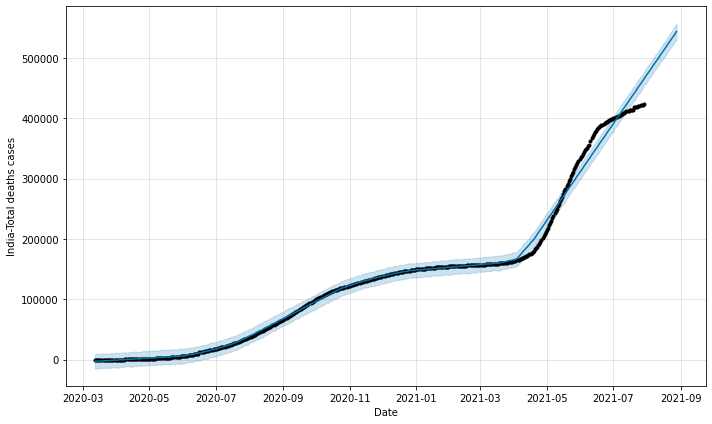

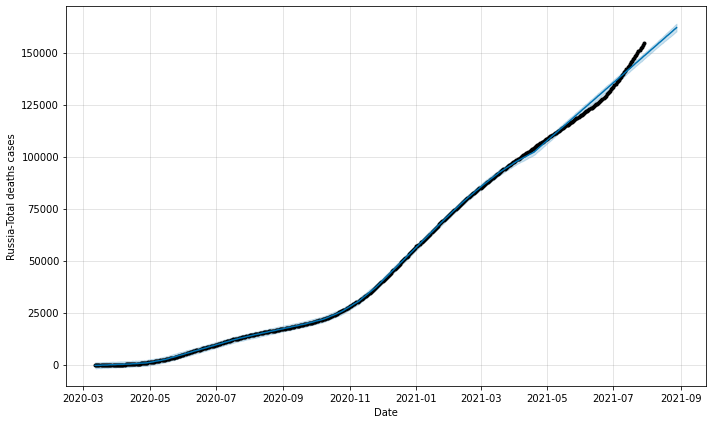

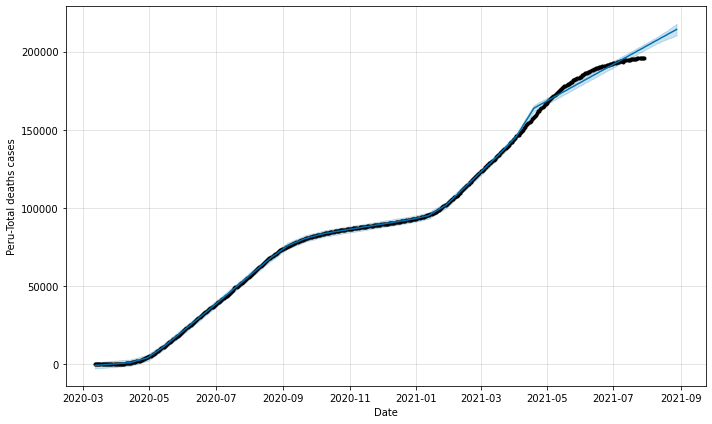

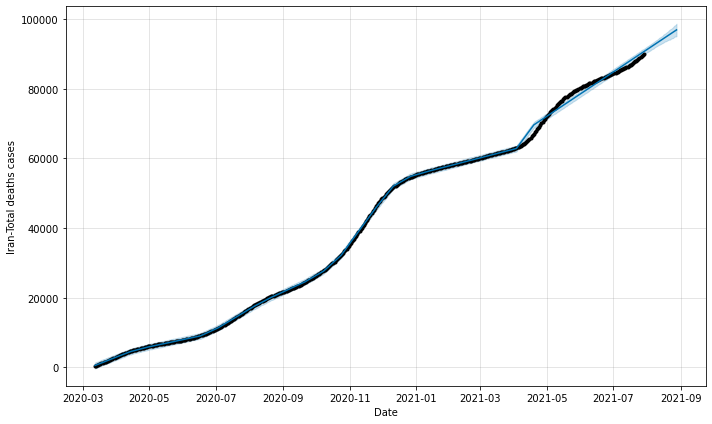

In [66]:
#most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

  

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total deaths cases' %(j))
    k=k+1

In [67]:
#most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)
    print('%s-Total deaths cases' %(j) ,'\n',  forecast)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


US-Total deaths cases 
             ds           yhat
505 2021-07-30  617334.693509
506 2021-07-31  617689.646558
507 2021-08-01  617589.978030
508 2021-08-02  617612.001020
509 2021-08-03  618229.567976
510 2021-08-04  619018.463814
511 2021-08-05  619696.105014
512 2021-08-06  620360.411184
513 2021-08-07  620715.364233
514 2021-08-08  620615.695705
515 2021-08-09  620637.718695
516 2021-08-10  621255.285651
517 2021-08-11  622044.181489
518 2021-08-12  622721.822689
519 2021-08-13  623386.128858
520 2021-08-14  623741.081907
521 2021-08-15  623641.413379
522 2021-08-16  623663.436369
523 2021-08-17  624281.003325
524 2021-08-18  625069.899164
525 2021-08-19  625747.540364
526 2021-08-20  626411.846533
527 2021-08-21  626766.799582
528 2021-08-22  626667.131054
529 2021-08-23  626689.154044
530 2021-08-24  627306.721000
531 2021-08-25  628095.616838
532 2021-08-26  628773.258038
533 2021-08-27  629437.564208
534 2021-08-28  629792.517257


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Brazil-Total deaths cases 
             ds           yhat
505 2021-07-30  617334.693509
506 2021-07-31  617689.646558
507 2021-08-01  617589.978030
508 2021-08-02  617612.001020
509 2021-08-03  618229.567976
510 2021-08-04  619018.463814
511 2021-08-05  619696.105014
512 2021-08-06  620360.411184
513 2021-08-07  620715.364233
514 2021-08-08  620615.695705
515 2021-08-09  620637.718695
516 2021-08-10  621255.285651
517 2021-08-11  622044.181489
518 2021-08-12  622721.822689
519 2021-08-13  623386.128858
520 2021-08-14  623741.081907
521 2021-08-15  623641.413379
522 2021-08-16  623663.436369
523 2021-08-17  624281.003325
524 2021-08-18  625069.899164
525 2021-08-19  625747.540364
526 2021-08-20  626411.846533
527 2021-08-21  626766.799582
528 2021-08-22  626667.131054
529 2021-08-23  626689.154044
530 2021-08-24  627306.721000
531 2021-08-25  628095.616838
532 2021-08-26  628773.258038
533 2021-08-27  629437.564208
534 2021-08-28  629792.517257


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


India-Total deaths cases 
             ds           yhat
505 2021-07-30  617334.693509
506 2021-07-31  617689.646558
507 2021-08-01  617589.978030
508 2021-08-02  617612.001020
509 2021-08-03  618229.567976
510 2021-08-04  619018.463814
511 2021-08-05  619696.105014
512 2021-08-06  620360.411184
513 2021-08-07  620715.364233
514 2021-08-08  620615.695705
515 2021-08-09  620637.718695
516 2021-08-10  621255.285651
517 2021-08-11  622044.181489
518 2021-08-12  622721.822689
519 2021-08-13  623386.128858
520 2021-08-14  623741.081907
521 2021-08-15  623641.413379
522 2021-08-16  623663.436369
523 2021-08-17  624281.003325
524 2021-08-18  625069.899164
525 2021-08-19  625747.540364
526 2021-08-20  626411.846533
527 2021-08-21  626766.799582
528 2021-08-22  626667.131054
529 2021-08-23  626689.154044
530 2021-08-24  627306.721000
531 2021-08-25  628095.616838
532 2021-08-26  628773.258038
533 2021-08-27  629437.564208
534 2021-08-28  629792.517257


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Russia-Total deaths cases 
             ds           yhat
505 2021-07-30  617334.693509
506 2021-07-31  617689.646558
507 2021-08-01  617589.978030
508 2021-08-02  617612.001020
509 2021-08-03  618229.567976
510 2021-08-04  619018.463814
511 2021-08-05  619696.105014
512 2021-08-06  620360.411184
513 2021-08-07  620715.364233
514 2021-08-08  620615.695705
515 2021-08-09  620637.718695
516 2021-08-10  621255.285651
517 2021-08-11  622044.181489
518 2021-08-12  622721.822689
519 2021-08-13  623386.128858
520 2021-08-14  623741.081907
521 2021-08-15  623641.413379
522 2021-08-16  623663.436369
523 2021-08-17  624281.003325
524 2021-08-18  625069.899164
525 2021-08-19  625747.540364
526 2021-08-20  626411.846533
527 2021-08-21  626766.799582
528 2021-08-22  626667.131054
529 2021-08-23  626689.154044
530 2021-08-24  627306.721000
531 2021-08-25  628095.616838
532 2021-08-26  628773.258038
533 2021-08-27  629437.564208
534 2021-08-28  629792.517257


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Peru-Total deaths cases 
             ds           yhat
505 2021-07-30  617334.693509
506 2021-07-31  617689.646558
507 2021-08-01  617589.978030
508 2021-08-02  617612.001020
509 2021-08-03  618229.567976
510 2021-08-04  619018.463814
511 2021-08-05  619696.105014
512 2021-08-06  620360.411184
513 2021-08-07  620715.364233
514 2021-08-08  620615.695705
515 2021-08-09  620637.718695
516 2021-08-10  621255.285651
517 2021-08-11  622044.181489
518 2021-08-12  622721.822689
519 2021-08-13  623386.128858
520 2021-08-14  623741.081907
521 2021-08-15  623641.413379
522 2021-08-16  623663.436369
523 2021-08-17  624281.003325
524 2021-08-18  625069.899164
525 2021-08-19  625747.540364
526 2021-08-20  626411.846533
527 2021-08-21  626766.799582
528 2021-08-22  626667.131054
529 2021-08-23  626689.154044
530 2021-08-24  627306.721000
531 2021-08-25  628095.616838
532 2021-08-26  628773.258038
533 2021-08-27  629437.564208
534 2021-08-28  629792.517257
Iran-Total deaths cases 
             ds    

**## Prediction of confirmed cases of India using MLP and LSTM-RNN**

In [68]:
india_df1=india_df[['Date','Confirmed']].copy().loc[:]
india_df1.head()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [69]:
len(india_df1)

555

In [70]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(india_df1)-n_steps

conf=india_df1['Confirmed'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Confirmed'].values.reshape(-1,1)
test = conf[train_size:]#['Confirmed'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

545

In [71]:
normal_test

array([[1.00134774],
       [1.00267521],
       [1.0038089 ],
       [1.0038089 ],
       [1.00633788],
       [1.00760049],
       [1.00855284],
       [1.00995316],
       [1.01134883],
       [1.01276762]])

**MultiLayer Perceptron (MLP)**

- Time Series Generator for generating batches for training/validation from a regular time series data.
- These batches will be fed to train the model.
- [How to use it for time series](https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/)

In [72]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [73]:
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

Samples: 535
[[[0.98648336]
  [0.9878552 ]
  [0.98918661]
  [0.99037843]
  [0.99143398]
  [0.99268067]
  [0.99401937]
  [0.99526877]
  [0.99649025]
  [0.99781047]]] => [[0.99903469]]
[[[0.9878552 ]
  [0.98918661]
  [0.99037843]
  [0.99143398]
  [0.99268067]
  [0.99401937]
  [0.99526877]
  [0.99649025]
  [0.99781047]
  [0.99903469]]] => [[1.]]


In [74]:
# estimation: input_neurons=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [75]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 200)           400       
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [77]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.00134774],
       [1.00267521],
       [1.0038089 ],
       [1.0038089 ],
       [1.00633788],
       [1.00760049],
       [1.00855284],
       [1.00995316],
       [1.01134883],
       [1.01276762]])

In [78]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [79]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit the model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 15s 54ms/step - loss: 0.0615 - val_loss: 0.2044
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0365 - val_loss: 8.4259e-04
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 7.2674e-04 - val_loss: 0.0063
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 5.6381e-04
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 4.5215e-04 - val_loss: 0.0073
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 3.5353e-04 - val_loss: 2.7475e-04
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 3.0755e-04 - val_loss: 1.9772e-04
Epoch 10/200
10/10 [==============================] - 0s 8ms/step - loss: 8

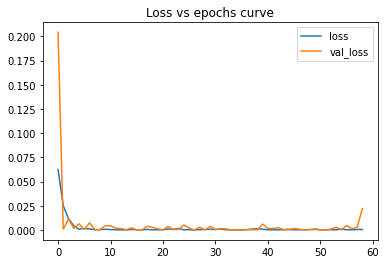

In [80]:
#plotting of Loss vs Epochs
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

Text(0, 0.5, 'Validation Loss')

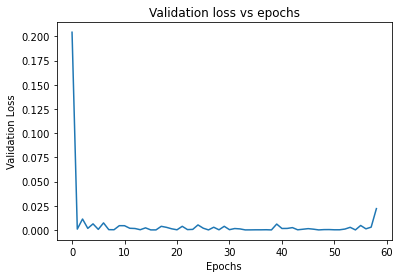

In [81]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

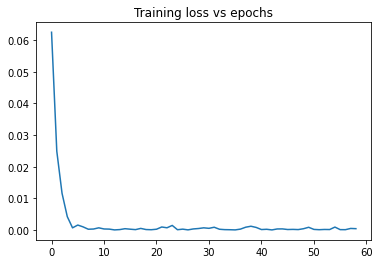

In [82]:
#Training loss and epochs 
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [83]:
# list of predictions
test_prediction = []

# last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [84]:
# forecast the number of confirmed cases in India for the validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0009967], dtype=float32),
 array([1.0021764], dtype=float32),
 array([1.003325], dtype=float32),
 array([1.0044954], dtype=float32),
 array([1.0056652], dtype=float32),
 array([1.006803], dtype=float32),
 array([1.007929], dtype=float32),
 array([1.0090796], dtype=float32),
 array([1.0102212], dtype=float32),
 array([1.0113294], dtype=float32),
 array([1.0124444], dtype=float32),
 array([1.0135794], dtype=float32),
 array([1.014705], dtype=float32),
 array([1.0158334], dtype=float32),
 array([1.0169595], dtype=float32),
 array([1.0180769], dtype=float32),
 array([1.0191933], dtype=float32)]

In [85]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([31205393.72325158, 31242169.91907715, 31277976.16875171,
       31314462.49561262, 31350930.24112963, 31386402.02661419,
       31421502.18522095, 31457371.61146474, 31492962.31755018,
       31527508.75210905, 31562267.01398825, 31597649.60902214,
       31632738.61882257, 31667916.81907367, 31703024.410218  ,
       31737856.99747276, 31772659.8545773 ])

In [86]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = india_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))

# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [87]:
prediction_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Confirmed_predicted"] = true_prediction[:,0]
test_set=india_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"Confirmed"] = india_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,Confirmed,Confirmed_predicted
2021-07-20,31216337,3.120539e+07
2021-07-21,31257720,3.124217e+07
2021-07-22,31293062,3.127798e+07
2021-07-23,31293062,3.131446e+07
2021-07-24,31371901,3.135093e+07
2021-07-25,31411262,3.138640e+07
2021-07-26,31440951,3.142150e+07
2021-07-27,31484605,3.145737e+07
2021-07-28,31528114,3.149296e+07
2021-07-29,31572344,3.152751e+07


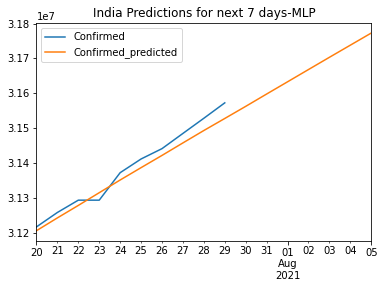

In [88]:
prediction_df.plot(title="India Predictions for next 7 days-MLP")

In [89]:
MAPE = np.mean(np.abs(np.array(prediction_df["Confirmed"][:n_steps]) -\
                      np.array(prediction_df["Confirmed_predicted"][:n_steps]))/np.array(prediction_df["Confirmed"][:n_steps]))
print("MAPE is ",MAPE*100," %")

MAPE is  0.0749245792098431  %


In [90]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.9992507542079 %


**A recurrent neural network, Long Short-Term Memory network (LSTM)**

In [91]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

Samples: 535


In [92]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [93]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.00134774],
       [1.00267521],
       [1.0038089 ],
       [1.0038089 ],
       [1.00633788],
       [1.00760049],
       [1.00855284],
       [1.00995316],
       [1.01134883],
       [1.01276762]])

In [94]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 10s 78ms/step - loss: 0.1413 - val_loss: 0.6187
Epoch 2/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0698 - val_loss: 0.1114
Epoch 3/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0052 - val_loss: 4.3471e-04
Epoch 4/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 2.0988e-04 - val_loss: 0.0513
Epoch 6/200
10/10 [==============================] - 0s 12ms/step - loss: 3.7410e-04 - val_loss: 0.0341
Epoch 7/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0022 - val_loss: 0.0453
Epoch 8/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0289 - val_loss: 0.0105
Epoch 9/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0048 - val_loss: 0.0091
Epoch 10/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0016 - val

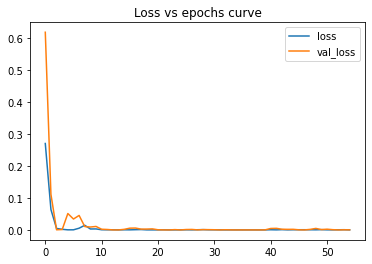

In [95]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

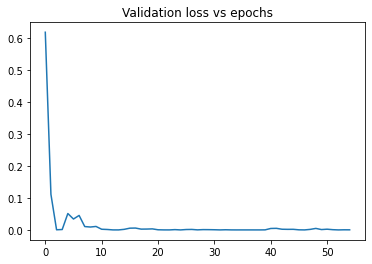

In [96]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

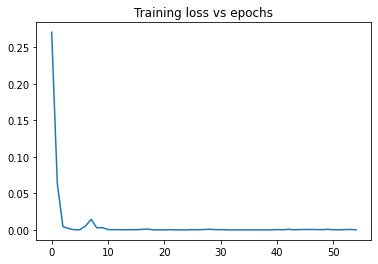

In [97]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [98]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [99]:
# forecast the number of Confirmed cases in India for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0019997], dtype=float32),
 array([1.003315], dtype=float32),
 array([1.0046463], dtype=float32),
 array([1.0059983], dtype=float32),
 array([1.0073531], dtype=float32),
 array([1.0087098], dtype=float32),
 array([1.0100727], dtype=float32),
 array([1.0114511], dtype=float32),
 array([1.0128354], dtype=float32),
 array([1.0142314], dtype=float32),
 array([1.0156572], dtype=float32),
 array([1.0170465], dtype=float32),
 array([1.0184416], dtype=float32),
 array([1.0198423], dtype=float32),
 array([1.0212481], dtype=float32),
 array([1.022659], dtype=float32),
 array([1.0240752], dtype=float32)]

In [100]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([31236662.40874838, 31277664.00217437, 31319167.29188537,
       31361313.49609494, 31403548.89075517, 31445843.74571585,
       31488331.84665298, 31531303.06253123, 31574456.37557959,
       31617977.59923696, 31662424.17382002, 31705733.57015705,
       31749225.06366419, 31792891.2218039 , 31836717.17950105,
       31880699.22048688, 31924848.4935677 ])

In [101]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = india_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [102]:
# prediction of future cases 
prediction_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Confirmed_predicted"] = true_prediction[:,0]
test_set=india_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"Confirmed"] = india_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,Confirmed,Confirmed_predicted
2021-07-20,31216337,3.123666e+07
2021-07-21,31257720,3.127766e+07
2021-07-22,31293062,3.131917e+07
2021-07-23,31293062,3.136131e+07
2021-07-24,31371901,3.140355e+07
2021-07-25,31411262,3.144584e+07
2021-07-26,31440951,3.148833e+07
2021-07-27,31484605,3.153130e+07
2021-07-28,31528114,3.157446e+07
2021-07-29,31572344,3.161798e+07


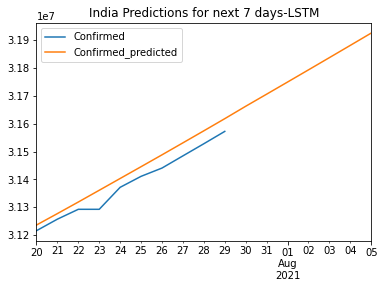

In [103]:
prediction_df.plot(title="India Predictions for next 7 days-LSTM")

In [104]:
MAPE = np.mean(np.abs(np.array(prediction_df["Confirmed"][:n_steps]) -\
                      np.array(prediction_df["Confirmed_predicted"][:n_steps]))/np.array(prediction_df["Confirmed"][:n_steps]))
print("MAPE is ",MAPE*100, " %")

print("Accuracy: ", 100-MAPE,"%")

MAPE is  0.12319581847571207  %
Accuracy:  99.99876804181524 %


** Prediction of deaths of india using MLP and LSTM-RNN**

In [106]:
india_df1=india_df[['Date','Deaths']].copy().loc[:]
india_df1.head()

,Date,Deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [107]:
len(india_df1)

555

In [108]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(india_df1)-n_steps

conf=india_df1['Deaths'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Deaths'].values.reshape(-1,1)
test = conf[train_size:]#['Deaths'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

545

In [109]:
normal_test

array([[1.00964577],
       [1.01086899],
       [1.0120343 ],
       [1.0120343 ],
       [1.01464237],
       [1.01564604],
       [1.01664729],
       [1.01819138],
       [1.01973548],
       [1.0210745 ]])

**Multilayer Perceptron (MLP)**

In [110]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [111]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

10
Samples: 535


In [112]:
for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[0.97938873]
  [0.98229839]
  [0.98445771]
  [0.98620447]
  [0.99107802]
  [0.99257869]
  [0.99398526]
  [0.99529292]
  [0.996644  ]
  [0.99789376]]] => [[0.99909767]]
[[[0.98229839]
  [0.98445771]
  [0.98620447]
  [0.99107802]
  [0.99257869]
  [0.99398526]
  [0.99529292]
  [0.996644  ]
  [0.99789376]
  [0.99909767]]] => [[1.]]


In [113]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10, 200)           400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [114]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.00964577],
       [1.01086899],
       [1.0120343 ],
       [1.0120343 ],
       [1.01464237],
       [1.01564604],
       [1.01664729],
       [1.01819138],
       [1.01973548],
       [1.0210745 ]])

In [115]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [116]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 1s 29ms/step - loss: 0.0352 - val_loss: 0.2867
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0084 - val_loss: 0.0013
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0016
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 6.6038e-04
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 9.3287e-05 - val_loss: 0.0013
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 4.9971e-04 - val_loss: 0.0019
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 1.9020e-04 - val_loss: 0.0054
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 1.7953e-04 - val_loss: 0.0066
Epoch 9/200
10/10 [==============================] - 0s 6ms/step - loss: 1.9068e-04 - val_loss: 0.0054
Epoch 10/200
10/10 [==============================] - 0s 7ms/step - loss: 7.3613e-05

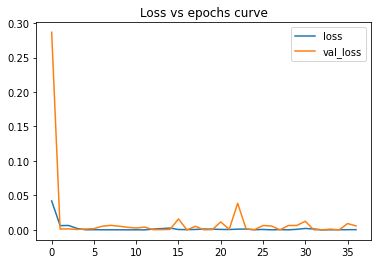

In [117]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

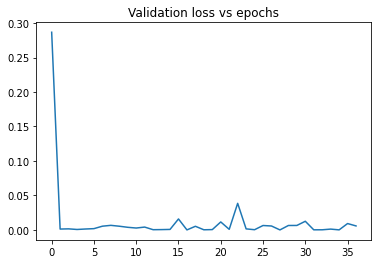

In [118]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

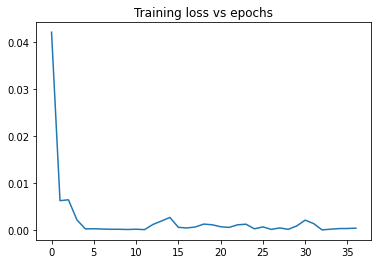

In [119]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [120]:
# forecast the number of Deaths cases in India for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0019997], dtype=float32),
 array([1.003315], dtype=float32),
 array([1.0046463], dtype=float32),
 array([1.0059983], dtype=float32),
 array([1.0073531], dtype=float32),
 array([1.0087098], dtype=float32),
 array([1.0100727], dtype=float32),
 array([1.0114511], dtype=float32),
 array([1.0128354], dtype=float32),
 array([1.0142314], dtype=float32),
 array([1.0156572], dtype=float32),
 array([1.0170465], dtype=float32),
 array([1.0184416], dtype=float32),
 array([1.0198423], dtype=float32),
 array([1.0212481], dtype=float32),
 array([1.022659], dtype=float32),
 array([1.0240752], dtype=float32),
 array([1.0220172], dtype=float32),
 array([1.0230238], dtype=float32),
 array([1.0242479], dtype=float32),
 array([1.0254335], dtype=float32),
 array([1.0265325], dtype=float32),
 array([1.0274192], dtype=float32),
 array([1.0282036], dtype=float32),
 array([1.0290782], dtype=float32),
 array([1.0300165], dtype=float32),
 array([1.0306563], dtype=float32),
 array([1.0313447], dtype=floa

In [121]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([415310.85450721, 415855.99619293, 416407.8082428 , 416968.16824079,
       417529.71408129, 418092.05048347, 418656.95621109, 419228.28525233,
       419802.03538871, 420380.67712545, 420971.62197828, 421547.44733906,
       422125.69379497, 422706.2625258 , 423288.95589113, 423873.72448087,
       424460.71652532, 423607.74988699, 424024.96881151, 424532.3117671 ,
       425023.74466896, 425479.25642467, 425846.76878381, 426171.88727307,
       426534.40921164, 426923.31614614, 427188.50017834, 427473.79412317,
       427876.78293753, 428283.82338047, 428679.54890943, 429054.17632365,
       429411.11492038, 429773.29098821])

In [140]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = india_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+24)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(34,)


In [141]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)


In [137]:
prediction_df

,Deaths,Deaths_predicted
2021-07-20,NaN,NaN
2021-07-21,NaN,NaN
2021-07-22,NaN,NaN
2021-07-23,NaN,NaN
2021-07-24,NaN,NaN
2021-07-25,NaN,NaN
2021-07-26,NaN,NaN
2021-07-27,NaN,NaN
2021-07-28,NaN,NaN
2021-07-29,NaN,NaN


In [142]:
prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=india_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = india_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2021-07-20,418480,415310.854507
2021-07-21,418987,415855.996193
2021-07-22,419470,416407.808243
2021-07-23,419470,416968.168241
2021-07-24,420551,417529.714081
2021-07-25,420967,418092.050483
2021-07-26,421382,418656.956211
2021-07-27,422022,419228.285252
2021-07-28,422662,419802.035389
2021-07-29,423217,420380.677125


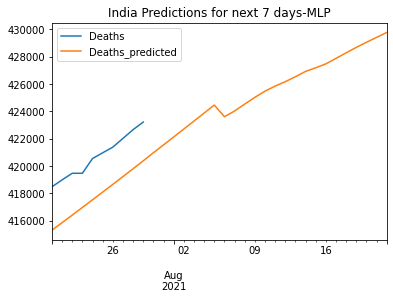

In [143]:
prediction_df.plot(title="India Predictions for next 7 days-MLP")

In [144]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                      np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
print("MAPE is ",MAPE*100, " %")

MAPE is  0.6887882842565531  %


In [145]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99311211715744 %


**A recurrent neural network, Long Short-Term Memory network (LSTM)**

In [146]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

Samples: 535


In [147]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

#from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

In [148]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_6 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [149]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.00964577],
       [1.01086899],
       [1.0120343 ],
       [1.0120343 ],
       [1.01464237],
       [1.01564604],
       [1.01664729],
       [1.01819138],
       [1.01973548],
       [1.0210745 ]])

In [150]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [151]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 3s 81ms/step - loss: 0.0128 - val_loss: 0.6460
Epoch 2/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0357 - val_loss: 0.1930
Epoch 3/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0053 - val_loss: 0.0542
Epoch 4/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0121 - val_loss: 0.1088
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0081 - val_loss: 0.2632
Epoch 6/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0022 - val_loss: 0.0365
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0119 - val_loss: 0.0254
Epoch 8/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 9/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0037
Epoch 10/200
10/10 [==============================] - 0s 13ms/step - loss: 9.1773e-04 - val_loss: 0.

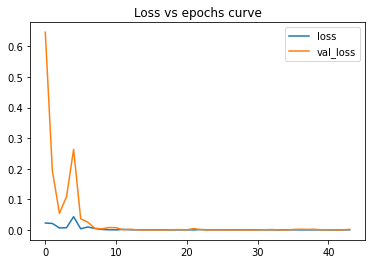

In [152]:
pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

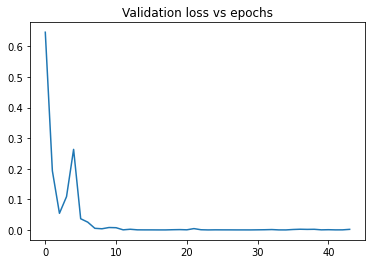

In [153]:
loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

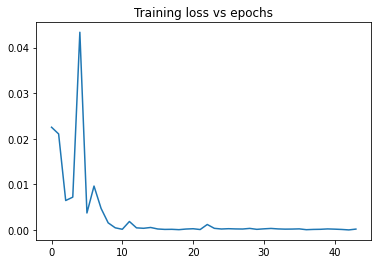

In [154]:
loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [155]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

(1, 10, 1)

In [156]:
# forecast the number of Deaths cases in India for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

[array([1.0009549], dtype=float32),
 array([1.002417], dtype=float32),
 array([1.0038729], dtype=float32),
 array([1.0051833], dtype=float32),
 array([1.0064923], dtype=float32),
 array([1.0078069], dtype=float32),
 array([1.0091305], dtype=float32),
 array([1.0104585], dtype=float32),
 array([1.0117943], dtype=float32),
 array([1.013143], dtype=float32),
 array([1.0145195], dtype=float32),
 array([1.0159221], dtype=float32),
 array([1.0173286], dtype=float32),
 array([1.0187404], dtype=float32),
 array([1.0201646], dtype=float32),
 array([1.0216018], dtype=float32),
 array([1.0230526], dtype=float32)]

In [157]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([414877.77493906, 415483.78987384, 416087.23548317, 416630.4007647 ,
       417172.92371488, 417717.81835008, 418266.41874313, 418816.84731007,
       419370.53694391, 419929.51345897, 420500.05193853, 421081.41123104,
       421664.401057  , 422249.56492758, 422839.86744905, 423435.55567193,
       424036.87664676])

In [159]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = india_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [161]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=india_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = india_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2021-07-20,418480,414877.774939
2021-07-21,418987,415483.789874
2021-07-22,419470,416087.235483
2021-07-23,419470,416630.400765
2021-07-24,420551,417172.923715
2021-07-25,420967,417717.818350
2021-07-26,421382,418266.418743
2021-07-27,422022,418816.847310
2021-07-28,422662,419370.536944
2021-07-29,423217,419929.513459


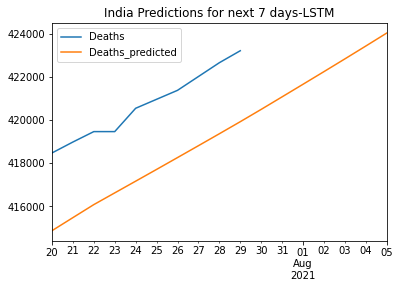

In [162]:
prediction_df.plot(title="India Predictions for next 7 days-LSTM")

In [163]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                      np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
print("MAPE is ",MAPE*100," %")

MAPE is  0.7809755357002248  %


In [164]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.992190244643 %


### World Confirm Cases

10
Samples: 535
[[[0.971935  ]
  [0.97459683]
  [0.97683057]
  [0.97873899]
  [0.98103922]
  [0.98376382]
  [0.98659319]
  [0.9895756 ]
  [0.9927181 ]
  [0.99519374]]] => [[0.99740165]]
[[[0.97459683]
  [0.97683057]
  [0.97873899]
  [0.98103922]
  [0.98376382]
  [0.98659319]
  [0.9895756 ]
  [0.9927181 ]
  [0.99519374]
  [0.99740165]]] => [[1.]]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10, 200)           400       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [===============

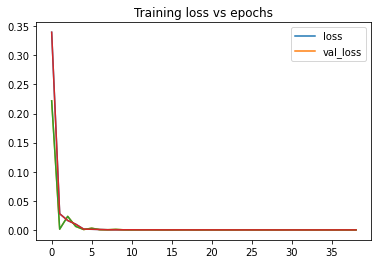

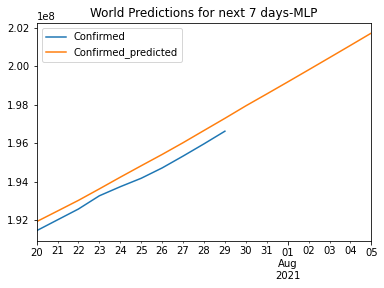

In [165]:
covid19_world1=covid19_world[['Date','Confirmed']].copy().loc[:]
covid19_world1.head()

len(covid19_world1)

# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(covid19_world1)-n_steps

conf=covid19_world1['Confirmed'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Confirmed'].values.reshape(-1,1)
test = conf[train_size:]#['Confirmed'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

normal_test

### Multilayer Perceptron (MLP)

from keras.preprocessing.sequence import TimeseriesGenerator

# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.summary()

validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

model.history.history.keys()

loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

# forecast the number of confirmed cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

prediction_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Confirmed_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"Confirmed"] = covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

prediction_df.plot(title="World Predictions for next 7 days-MLP")

MAPE = np.mean(np.abs(np.array(prediction_df["Confirmed"][:n_steps]) -\
                      np.array(prediction_df["Confirmed_predicted"][:n_steps]))/np.array(prediction_df["Confirmed"][:n_steps]))
print("MAPE is ",MAPE*100," %")

print("Accuracy: ", 100-MAPE,"%")

Samples: 535
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_10 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 3s 80ms/step - loss: 0.2009 - val_loss: 0.5827
Epoch 2/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0558 - val_loss: 0.2052
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0628 - val_loss: 0.0109
Epoch 4/200
10/10 [==============================] - 0s 13ms/step

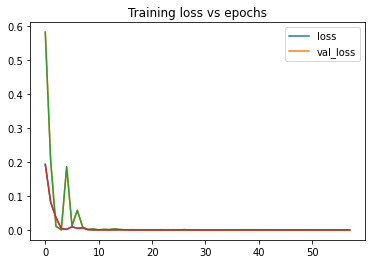

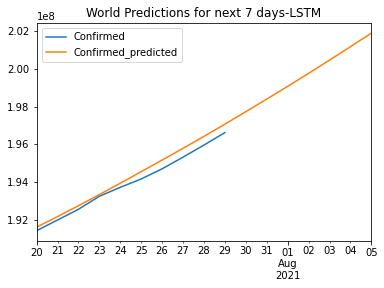

In [166]:
### A recurrent neural network, Long Short-Term Memory network (LSTM)

# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

model.summary()

validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

model.history.history.keys()

loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

# forecast the number of Confirmed cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

prediction_df = pd.DataFrame(columns=["Confirmed","Confirmed_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Confirmed_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"Confirmed"] = covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

prediction_df.plot(title="World Predictions for next 7 days-LSTM")

MAPE = np.mean(np.abs(np.array(prediction_df["Confirmed"][:n_steps]) -\
                      np.array(prediction_df["Confirmed_predicted"][:n_steps]))/np.array(prediction_df["Confirmed"][:n_steps]))
print("MAPE is ",MAPE*100," %")

print("Accuracy: ", 100-MAPE,"%")

### Prediction of deaths of the world using MLP and LSTM-RNN

10
Samples: 535
[[[0.97903897]
  [0.98111154]
  [0.98273553]
  [0.98450352]
  [0.98651825]
  [0.98854055]
  [0.99067561]
  [0.99274525]
  [0.99488055]
  [0.99660876]]] => [[0.99823812]]
[[[0.98111154]
  [0.98273553]
  [0.98450352]
  [0.98651825]
  [0.98854055]
  [0.99067561]
  [0.99274525]
  [0.99488055]
  [0.99660876]
  [0.99823812]]] => [[1.]]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10, 200)           400       
_________________________________________________________________
flatten_3 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [===============

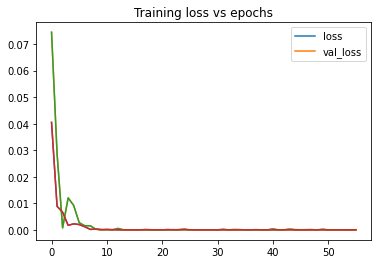

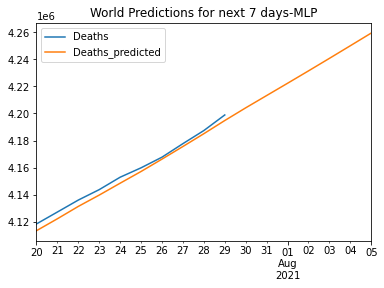

In [167]:
## Prediction of deaths of the world using MLP and LSTM-RNN

covid19_world1=covid19_world[['Date','Deaths']].copy().loc[:]
covid19_world1.head()

len(covid19_world1)

# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(covid19_world1)-n_steps

conf=covid19_world1['Deaths'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Deaths'].values.reshape(-1,1)
test = conf[train_size:]#['Deaths'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

normal_test

### Multilayer Perceptron (MLP)

# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

for i in range(len(generator)-2,len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.summary()

validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

model.history.history.keys()

loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

# forecast the number of Deaths cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

prediction_df.plot(title="World Predictions for next 7 days-MLP")

MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                      np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
print("MAPE is ",MAPE*100," %")

print("Accuracy: ", 100-MAPE,"%")

Samples: 535
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_14 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 3s 85ms/step - loss: 0.1947 - val_loss: 0.6990
Epoch 2/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0351 - val_loss: 0.3206
Epoch 3/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0299 - val_loss: 0.0159
Epoch 4/200
10/10 [==============================] - 0s 12ms/step

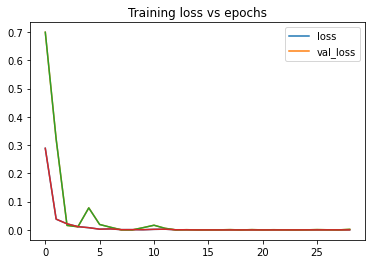

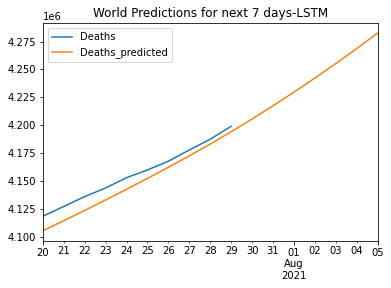

In [168]:
### A recurrent neural network, Long Short-Term Memory network (LSTM)

# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)

# number of samples
print('Samples: %d' % len(generator))

# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

model.summary()

validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

pd.DataFrame(model.history.history).plot(title="Loss vs epochs curve")

model.history.history.keys()

loss_1 = model.history.history["val_loss"]
plt.title("Validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

loss_1 = model.history.history["loss"]
plt.title("Training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

current_batch.shape

# forecast the number of Deaths cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

test_prediction

# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)

prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

prediction_df.plot(title="World Predictions for next 7 days-LSTM")

MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:n_steps]) -\
                      np.array(prediction_df["Deaths_predicted"][:n_steps]))/np.array(prediction_df["Deaths"][:n_steps]))
print("MAPE is ",MAPE*100," %")

print("Accuracy: ", 100-MAPE,"%")

#** Data modeling and prediction based on dataframes (multivariate time series)**

## Predicting the total number of confirmed cases of the world

In [169]:
data = covid19_world.copy().drop(['Date'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Confirmed                555 non-null    int64  
 1   Deaths                   555 non-null    int64  
 2   Recovered                555 non-null    int64  
 3   Active                   555 non-null    int64  
 4   New confirmed            555 non-null    int64  
 5   New deaths               555 non-null    int64  
 6   New recovered            555 non-null    int64  
 7   Recovery rate(per 100)   555 non-null    float64
 8   Mortality rate(per 100)  555 non-null    float64
 9   Number of countries      555 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 43.5 KB


In [170]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
count,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,5.550000e+02,555.000000,5.550000e+02,555.000000,555.000000,555.000000
mean,6.735581e+07,1.596774e+06,4.042661e+07,2.533242e+07,3.553593e+05,7565.598198,2.298473e+05,14.193189,3.373045,174.200000
std,6.430824e+07,1.326280e+06,3.954551e+07,2.393476e+07,2.447227e+05,4223.719547,3.229329e+05,30.231778,1.569110,43.545876
min,5.570000e+02,1.700000e+01,3.000000e+01,5.100000e+02,0.000000e+00,0.000000,-5.996609e+06,-67.470000,2.040000,6.000000
25%,7.192934e+06,4.303335e+05,3.276354e+06,3.512599e+06,1.298405e+05,5083.000000,7.818050e+04,-5.615000,2.220000,186.000000
50%,4.307581e+07,1.206888e+06,2.880616e+07,1.306276e+07,3.318200e+05,6999.000000,2.350510e+05,9.790000,2.520000,187.000000
75%,1.192914e+08,2.726724e+06,6.660325e+07,4.996138e+07,5.391475e+05,10360.000000,3.319165e+05,39.325000,3.990000,191.000000
max,1.966258e+08,4.198924e+06,1.275653e+08,6.486163e+07,1.498044e+06,20885.000000,1.498804e+06,68.170000,7.350000,193.000000


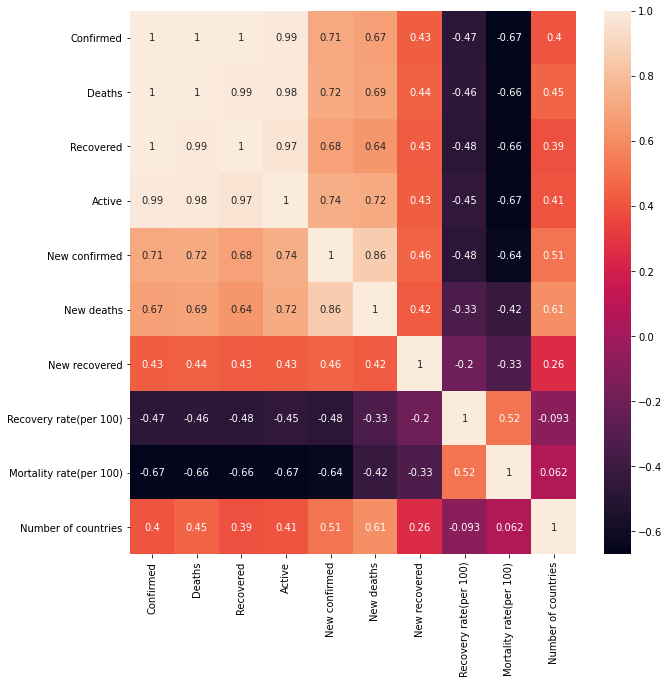

In [171]:
# Correlations
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [172]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [173]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X, y,test_size = 0.2,random_state=42)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(444, 9)
(444,)
(111, 9)
(111,)


### Decision tree regressor

RMSE of  DecisionTreeRegressor 671498.52
MAE of  DecisionTreeRegressor 494835.24 



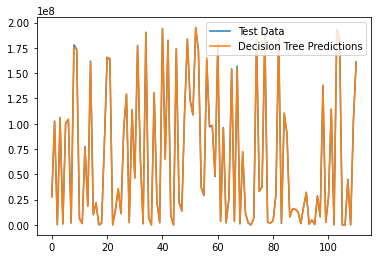

In [174]:
tree_reg = DecisionTreeRegressor(max_depth=8, random_state=42)

tree_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = tree_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Decision Tree Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", tree_reg.__class__.__name__, round(rmse,2))
print("MAE of ", tree_reg.__class__.__name__, round(mae,2), '\n')

### Support vector machine regressor

RMSE of  SVR 67921413.55
MAE of  SVR 56774356.89 



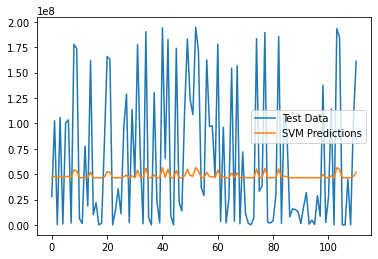

In [175]:
svm_reg = SVR(C=1000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 26875621.45
MAE of  SVR 23769765.85 



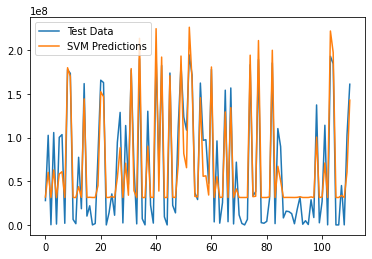

In [176]:
# C value increase
svm_reg = SVR(C=100000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 26875621.45
MAE of  SVR 23769765.85 



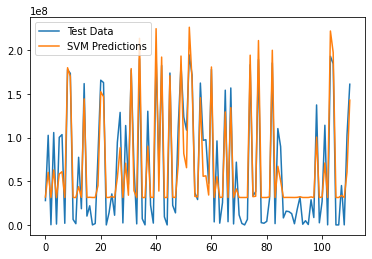

In [180]:
svm_reg = SVR(C=100000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

### Random Forests Regressor

RMSE of  RandomForestRegressor 322787.26
MAE of  RandomForestRegressor 193788.42 



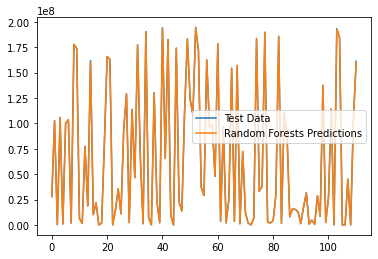

In [181]:
rf_reg = RandomForestRegressor(max_depth=8,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

### XGBoost Regressor

In [182]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

[06:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

RMSE of  XGBRegressor 428875.39
MAE of  XGBRegressor 327001.58 



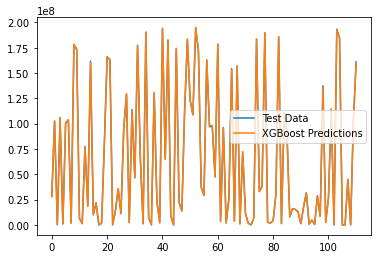

In [183]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

## Predicting the total number of confirmed cases of the world after addition of some new features

In [184]:
data = covid19_country_latest.copy()
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region
0,Afghanistan,145996,6615,82586,56795,444,38,0,56.57,4.53,EMRO
1,Albania,132999,2457,130187,355,47,0,13,97.89,1.85,EURO
2,Algeria,168668,4189,113707,50772,1537,28,807,67.41,2.48,AFRO
3,Andorra,14655,127,14180,348,69,0,67,96.76,0.87,EURO
4,Angola,42486,1003,36025,5458,198,3,61,84.79,2.36,AFRO


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           194 non-null    object 
 1   Confirmed                194 non-null    int64  
 2   Deaths                   194 non-null    int64  
 3   Recovered                194 non-null    int64  
 4   Active                   194 non-null    int64  
 5   New confirmed            194 non-null    int64  
 6   New deaths               194 non-null    int64  
 7   New recovered            194 non-null    int64  
 8   Recovery rate(per 100)   194 non-null    float64
 9   Mortality rate(per 100)  194 non-null    float64
 10  WHO region               192 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 16.8+ KB


In [186]:
data.describe(include='all')

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region
count,194,1.940000e+02,194.000000,1.940000e+02,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,192
unique,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EURO
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
mean,NaN,1.013535e+06,21643.938144,6.575529e+05,3.343383e+05,3418.201031,59.587629,1774.984536,77.391392,2.089485,NaN
std,NaN,3.763703e+06,72801.267355,2.670497e+06,2.532474e+06,9479.082475,209.485590,5751.405042,31.086014,2.557322,NaN
min,NaN,0.000000e+00,0.000000,0.000000e+00,-1.629800e+05,0.000000,-87.000000,-4320.000000,-38.660000,0.000000,NaN
25%,NaN,1.422175e+04,180.750000,6.882000e+03,5.662500e+02,14.250000,0.000000,0.000000,75.537500,0.912500,NaN
50%,NaN,1.227010e+05,1925.500000,7.006500e+04,5.867000e+03,186.000000,1.500000,62.500000,92.070000,1.600000,NaN
75%,NaN,4.822442e+05,8681.750000,3.254972e+05,4.417200e+04,1346.000000,16.000000,807.000000,96.417500,2.520000,NaN


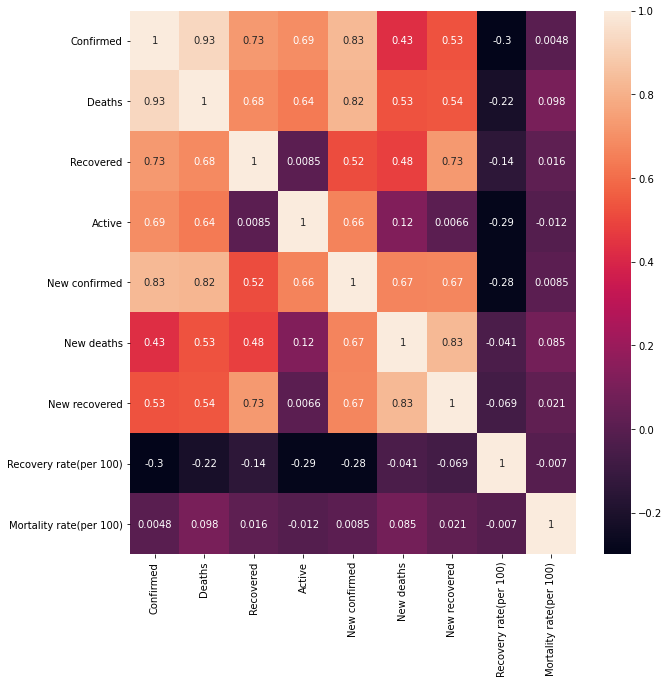

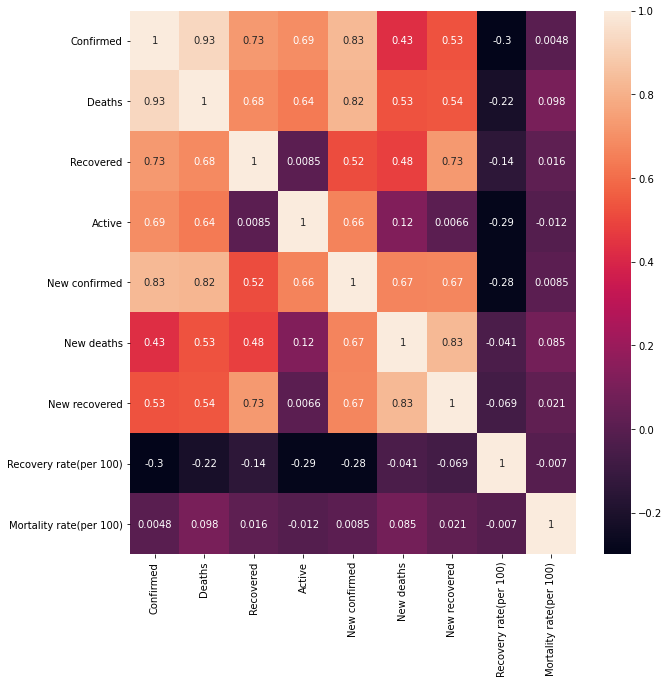

In [188]:
# Correlations
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

### Add new features related to happiness in life to the dataframe


In [189]:
data1=data.copy()

happiness_df = pd.read_csv("happiness.csv")
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [191]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [192]:
happiness_df1 = happiness_df[['Country or region', 'Healthy life expectancy']]

data1 = data1.merge(happiness_df1, left_on='Country/Region', right_on='Country or region').drop(['Country or region'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           144 non-null    object 
 1   Confirmed                144 non-null    int64  
 2   Deaths                   144 non-null    int64  
 3   Recovered                144 non-null    int64  
 4   Active                   144 non-null    int64  
 5   New confirmed            144 non-null    int64  
 6   New deaths               144 non-null    int64  
 7   New recovered            144 non-null    int64  
 8   Recovery rate(per 100)   144 non-null    float64
 9   Mortality rate(per 100)  144 non-null    float64
 10  WHO region               144 non-null    object 
 11  Healthy life expectancy  144 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 14.6+ KB


In [193]:
data1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region,Healthy life expectancy
0,Afghanistan,145996,6615,82586,56795,444,38,0,56.57,4.53,EMRO,0.361
1,Albania,132999,2457,130187,355,47,0,13,97.89,1.85,EURO,0.874
2,Algeria,168668,4189,113707,50772,1537,28,807,67.41,2.48,AFRO,0.785
3,Argentina,4905925,105113,4542904,257908,14115,291,13645,92.60,2.14,PAHO,0.881
4,Armenia,229603,4604,219502,5497,233,7,123,95.60,2.01,EURO,0.815


In [194]:
px.scatter(data1, y='Mortality rate(per 100)', x='Healthy life expectancy', color='WHO region', hover_data=['Country/Region'])

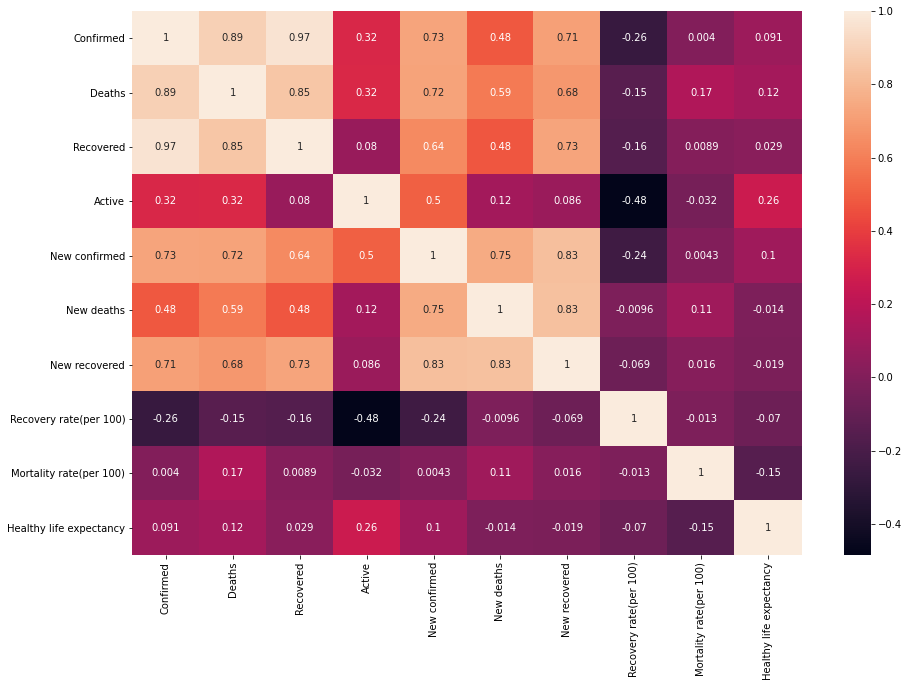

In [195]:
# Correlations
plt.figure(figsize= (15,10))
sns.heatmap(data1.corr(), annot = True)

**Conclusion:**
By the correlations above, it seems that the correlation between 'Healthy life expectancy' and 'Confirmed', 'Deaths', 'Recovered', 'Active','Recovery rate(per 100)'or 'Mortality rate(per 100)' is weak. So, such an addition may not help us in increasing the accuracy of predictions.

In [196]:
data1=data.copy()

In [197]:
happiness_df1 = happiness_df.drop(['Healthy life expectancy'],axis=1)

data1 = data1.merge(happiness_df1, left_on='Country/Region', right_on='Country or region').drop(['Country or region'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country/Region                144 non-null    object 
 1   Confirmed                     144 non-null    int64  
 2   Deaths                        144 non-null    int64  
 3   Recovered                     144 non-null    int64  
 4   Active                        144 non-null    int64  
 5   New confirmed                 144 non-null    int64  
 6   New deaths                    144 non-null    int64  
 7   New recovered                 144 non-null    int64  
 8   Recovery rate(per 100)        144 non-null    float64
 9   Mortality rate(per 100)       144 non-null    float64
 10  WHO region                    144 non-null    object 
 11  Overall rank                  144 non-null    int64  
 12  Score                         144 non-null    float64
 13  GDP p

In [198]:
data1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region,Overall rank,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,145996,6615,82586,56795,444,38,0,56.57,4.53,EMRO,154,3.203,0.350,0.517,0.000,0.158,0.025
1,Albania,132999,2457,130187,355,47,0,13,97.89,1.85,EURO,107,4.719,0.947,0.848,0.383,0.178,0.027
2,Algeria,168668,4189,113707,50772,1537,28,807,67.41,2.48,AFRO,88,5.211,1.002,1.160,0.086,0.073,0.114
3,Argentina,4905925,105113,4542904,257908,14115,291,13645,92.60,2.14,PAHO,47,6.086,1.092,1.432,0.471,0.066,0.050
4,Armenia,229603,4604,219502,5497,233,7,123,95.60,2.01,EURO,116,4.559,0.850,1.055,0.283,0.095,0.064


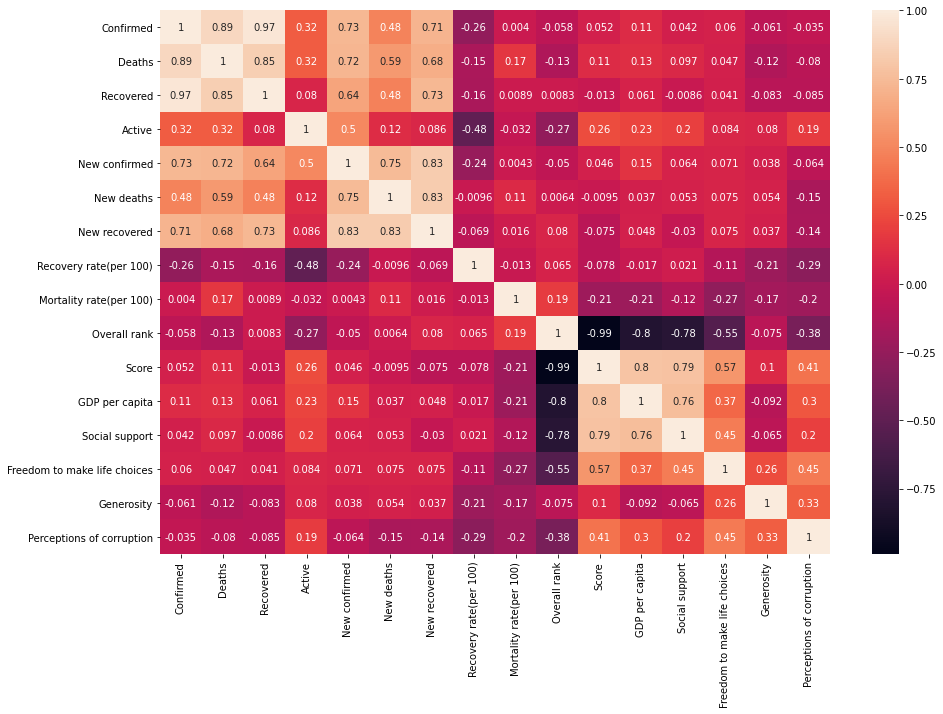

In [199]:
# Correlations
plt.figure(figsize= (15,10))
sns.heatmap(data1.corr(), annot = True)

**Conclusion:**
Similar to the previous case, the correlation between each of the added features and 'Confirmed', 'Deaths', 'Recovered', 'Active','Recovery rate(per 100)'or 'Mortality rate(per 100)' seems to be weak. So, such additions may not help us in increasing the accuracy of predictions.

### Add new features related to populations to the dataframe

In [200]:
data1=data.copy()

population_df = pd.read_csv("population_by_country_2020.csv")
population_df.head()

,Country (or dependency),Population (2020),Yearly Change(percent),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop(percent),World Share(percent)
0,China,1438207241,0.39,5540090,153,9388211,-348399.0,1.7,38,61,18.47
1,India,1377233523,0.99,13586631,464,2973190,-532687.0,2.2,28,35,17.70
2,United States,330610570,0.59,1937734,36,9147420,954806.0,1.8,38,83,4.25
3,Indonesia,272931713,1.07,2898047,151,1811570,-98955.0,2.3,30,56,3.51
4,Pakistan,219992900,2.00,4327022,287,770880,-233379.0,3.6,23,35,2.83


In [201]:
population_df.shape

(235, 11)

In [202]:
population_df1 = population_df[['Country (or dependency)', 'Population (2020)']]

data1 = data1.merge(population_df1, left_on='Country/Region', right_on='Country (or dependency)').drop(['Country (or dependency)'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           182 non-null    object 
 1   Confirmed                182 non-null    int64  
 2   Deaths                   182 non-null    int64  
 3   Recovered                182 non-null    int64  
 4   Active                   182 non-null    int64  
 5   New confirmed            182 non-null    int64  
 6   New deaths               182 non-null    int64  
 7   New recovered            182 non-null    int64  
 8   Recovery rate(per 100)   182 non-null    float64
 9   Mortality rate(per 100)  182 non-null    float64
 10  WHO region               181 non-null    object 
 11  Population (2020)        182 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 18.5+ KB


In [203]:
data1.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region,Population (2020)
0,Afghanistan,145996,6615,82586,56795,444,38,0,56.57,4.53,EMRO,38742911
1,Albania,132999,2457,130187,355,47,0,13,97.89,1.85,EURO,2878420
2,Algeria,168668,4189,113707,50772,1537,28,807,67.41,2.48,AFRO,43685618
3,Andorra,14655,127,14180,348,69,0,67,96.76,0.87,EURO,77240
4,Angola,42486,1003,36025,5458,198,3,61,84.79,2.36,AFRO,32644783
5,Antigua and Barbuda,1295,43,1235,17,7,0,6,95.37,3.32,PAHO,97764
6,Argentina,4905925,105113,4542904,257908,14115,291,13645,92.60,2.14,PAHO,45111229
7,Armenia,229603,4604,219502,5497,233,7,123,95.60,2.01,EURO,2962137
8,Australia,33909,923,24036,8950,183,0,14,70.88,2.72,WPRO,25439164
9,Austria,658004,10737,642229,5038,503,0,349,97.60,1.63,EURO,8996022


In [205]:
# remove countries with very high populations for beter visualization

data2 = data1[data1['Country/Region'].str.contains('China')!=True]
data2 = data2[data2['Country/Region'].str.contains('India')!=True]

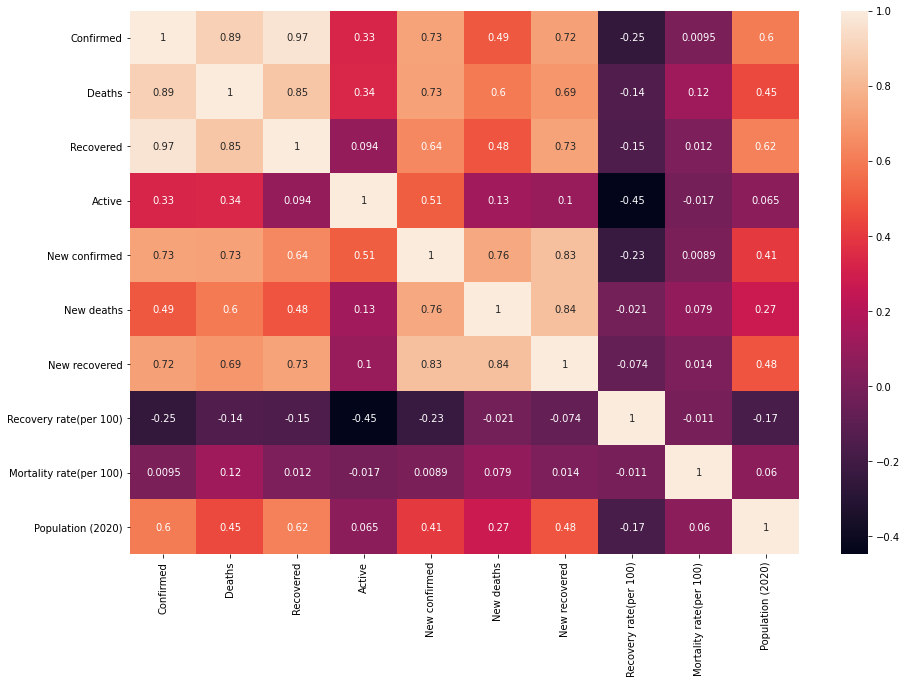

In [206]:
# Correlations
plt.figure(figsize= (15,10))
sns.heatmap(data1.corr(), annot = True)

**Conclusion:**
By the correlations above, it seems that the correlation between 'Population' and 'Confirmed' or 'Active' is moderate (near 0.6). Also, there exists a week correlation between 'Population' and 'Recovery rate(per 100)' or 'Mortality rate(per 100)'.

In [ ]:
************************** COMPLETE *************************************************************